Importing the necessary libraries

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import cv2

# 1. Analog Filters:

## (a) Consider a RC circuit with input voltage Vi = 10V applied to theseries RC and output Vo taken from the ends of C with R = 47k and C = 47nF. Find the transfer function of the circuit and plot the frequency and magnitude spectrum. Which kind of filter is this? Prove your claim by putting in the frequency as 100Hz and 10000Hz and finding the values of Vo. Find the cutoff frequency and verify that the behaviour is justified.

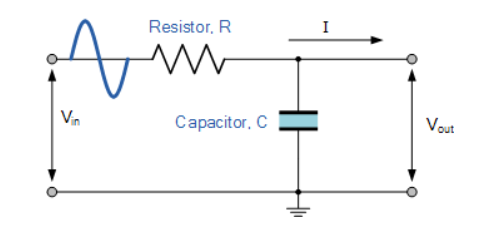

In [89]:
R = 47*(10**3) # in ohms
C = 47*(10**(-9)) # in Farads

# Transfer function = 1/(jwRC+1)

f = np.arange(1,50000,1)   # in Hz
w = 2*np.pi*f              # in rad/sec
H = 1/((1j*w*R*C)+1)       # Transfer function
mag_H = 20*np.log10(np.abs(H))  # Magnitude in dB
ph_H = np.angle(H,deg=True)     # Phase in degrees

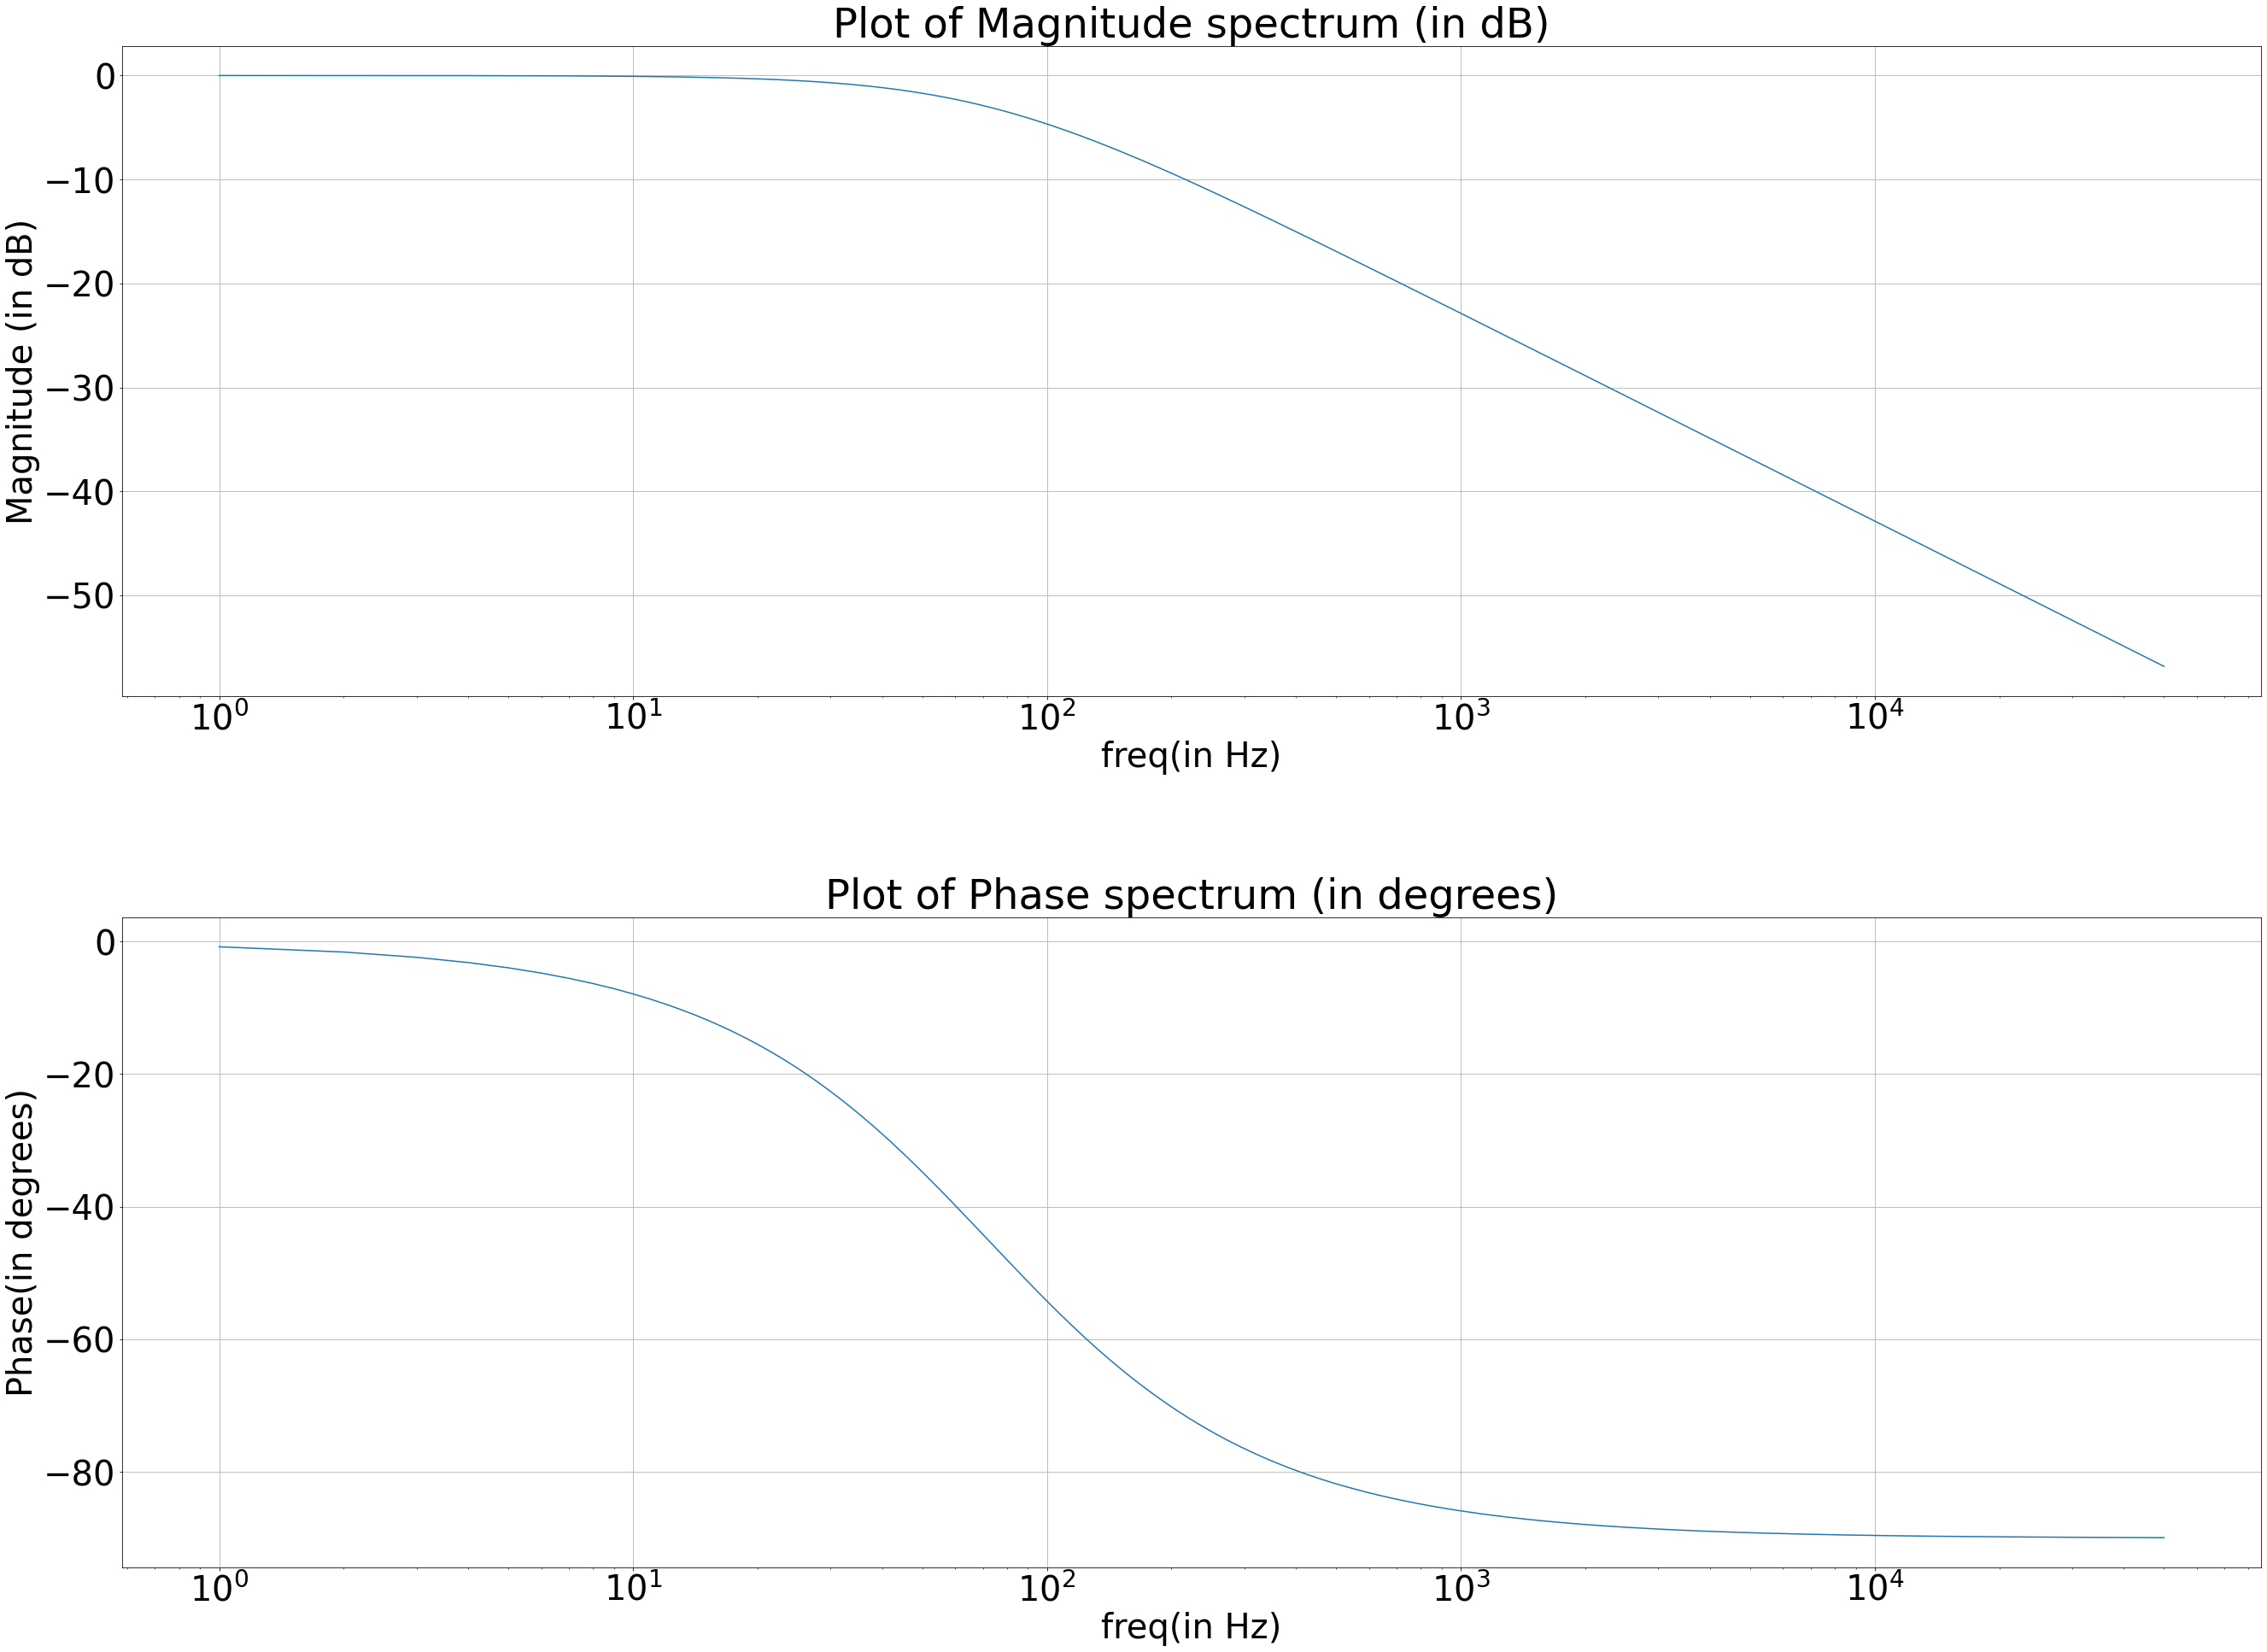

In [90]:
# Plotting the magnitude and phase spectra

matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(2,figsize=(40,30))

ax[0].plot(f,mag_H)
ax[0].set_xscale('log')
ax[0].set_xlabel('freq(in Hz)')
ax[0].set_ylabel('Magnitude (in dB)')
ax[0].set_title('Plot of Magnitude spectrum (in dB)')
ax[0].grid()

ax[1].plot(f,ph_H)
ax[1].set_xscale('log')
ax[1].set_xlabel('freq(in Hz)')
ax[1].set_ylabel('Phase(in degrees)')
ax[1].set_title('Plot of Phase spectrum (in degrees)')
ax[1].grid()
fig.tight_layout(pad=3.0)


Inference:
Based on the magnitude response, above filter is a low pass filter

In [91]:
f1 = 100.00 #in Hz
f2 = 10000.00 # in Hz


# Input voltage, Vi=10V => Output voltage, Vo=Transfer function*Vi

Vi = 10
Vo = H*Vi 
Vo_1 = np.round(np.abs(Vo[f==f1][0]),4)  # Output VOltage at freq=100 Hz
Vo_2 = np.round(np.abs(Vo[f==f2][0]),4)  # Output Voltage at freq=10000Hz
print(f'The output voltage of RC circuit at frequency, f={f1} is {Vo_1} V')
print(f'The output voltage of RC circuit at frequency, f={f2} is {Vo_2} V')

The output voltage of RC circuit at frequency, f=100.0 is 5.8456 V
The output voltage of RC circuit at frequency, f=10000.0 is 0.072 V


In [92]:
# Calculation of cutoff frequency from the magnitude spectrum
index_3db = np.argmin(np.abs(mag_H+3))
f_3db = f[index_3db]
print(f'The cutoff frequency of given low pass RC filter is {f_3db} Hz (approx)')

The cutoff frequency of given low pass RC filter is 72 Hz (approx)


## (b) Consider the same circuit mentioned before, but now the output voltage is taken across the resistor. Does this change the behaviour ofthe transfer function? Find the transfer function of the circuit and plot the frequency and magnitude spectrum. Which kind of filter is this? Prove your claim by putting in the frequency as 100Hz and10000Hz and finding the values of Vo. Find the cutoff frequency and verify that the behaviour is justified.

In [93]:
R = 47*(10**3) # in ohms
C = 47*(10**(-9)) # in Farads

# Transfer function = jwRC/(jwRC+1)

f = np.arange(1,50000,1)   # Freq in Hz
w = 2*np.pi*f              # Ang freq in rad/sec
H = (1j*w*R*C)/((1j*w*R*C)+1)   # Transfer function
mag_H = 20*np.log10(np.abs(H))  # Magnitude of H in dB
ph_H = np.angle(H,deg=True)     # Phase of H in degree

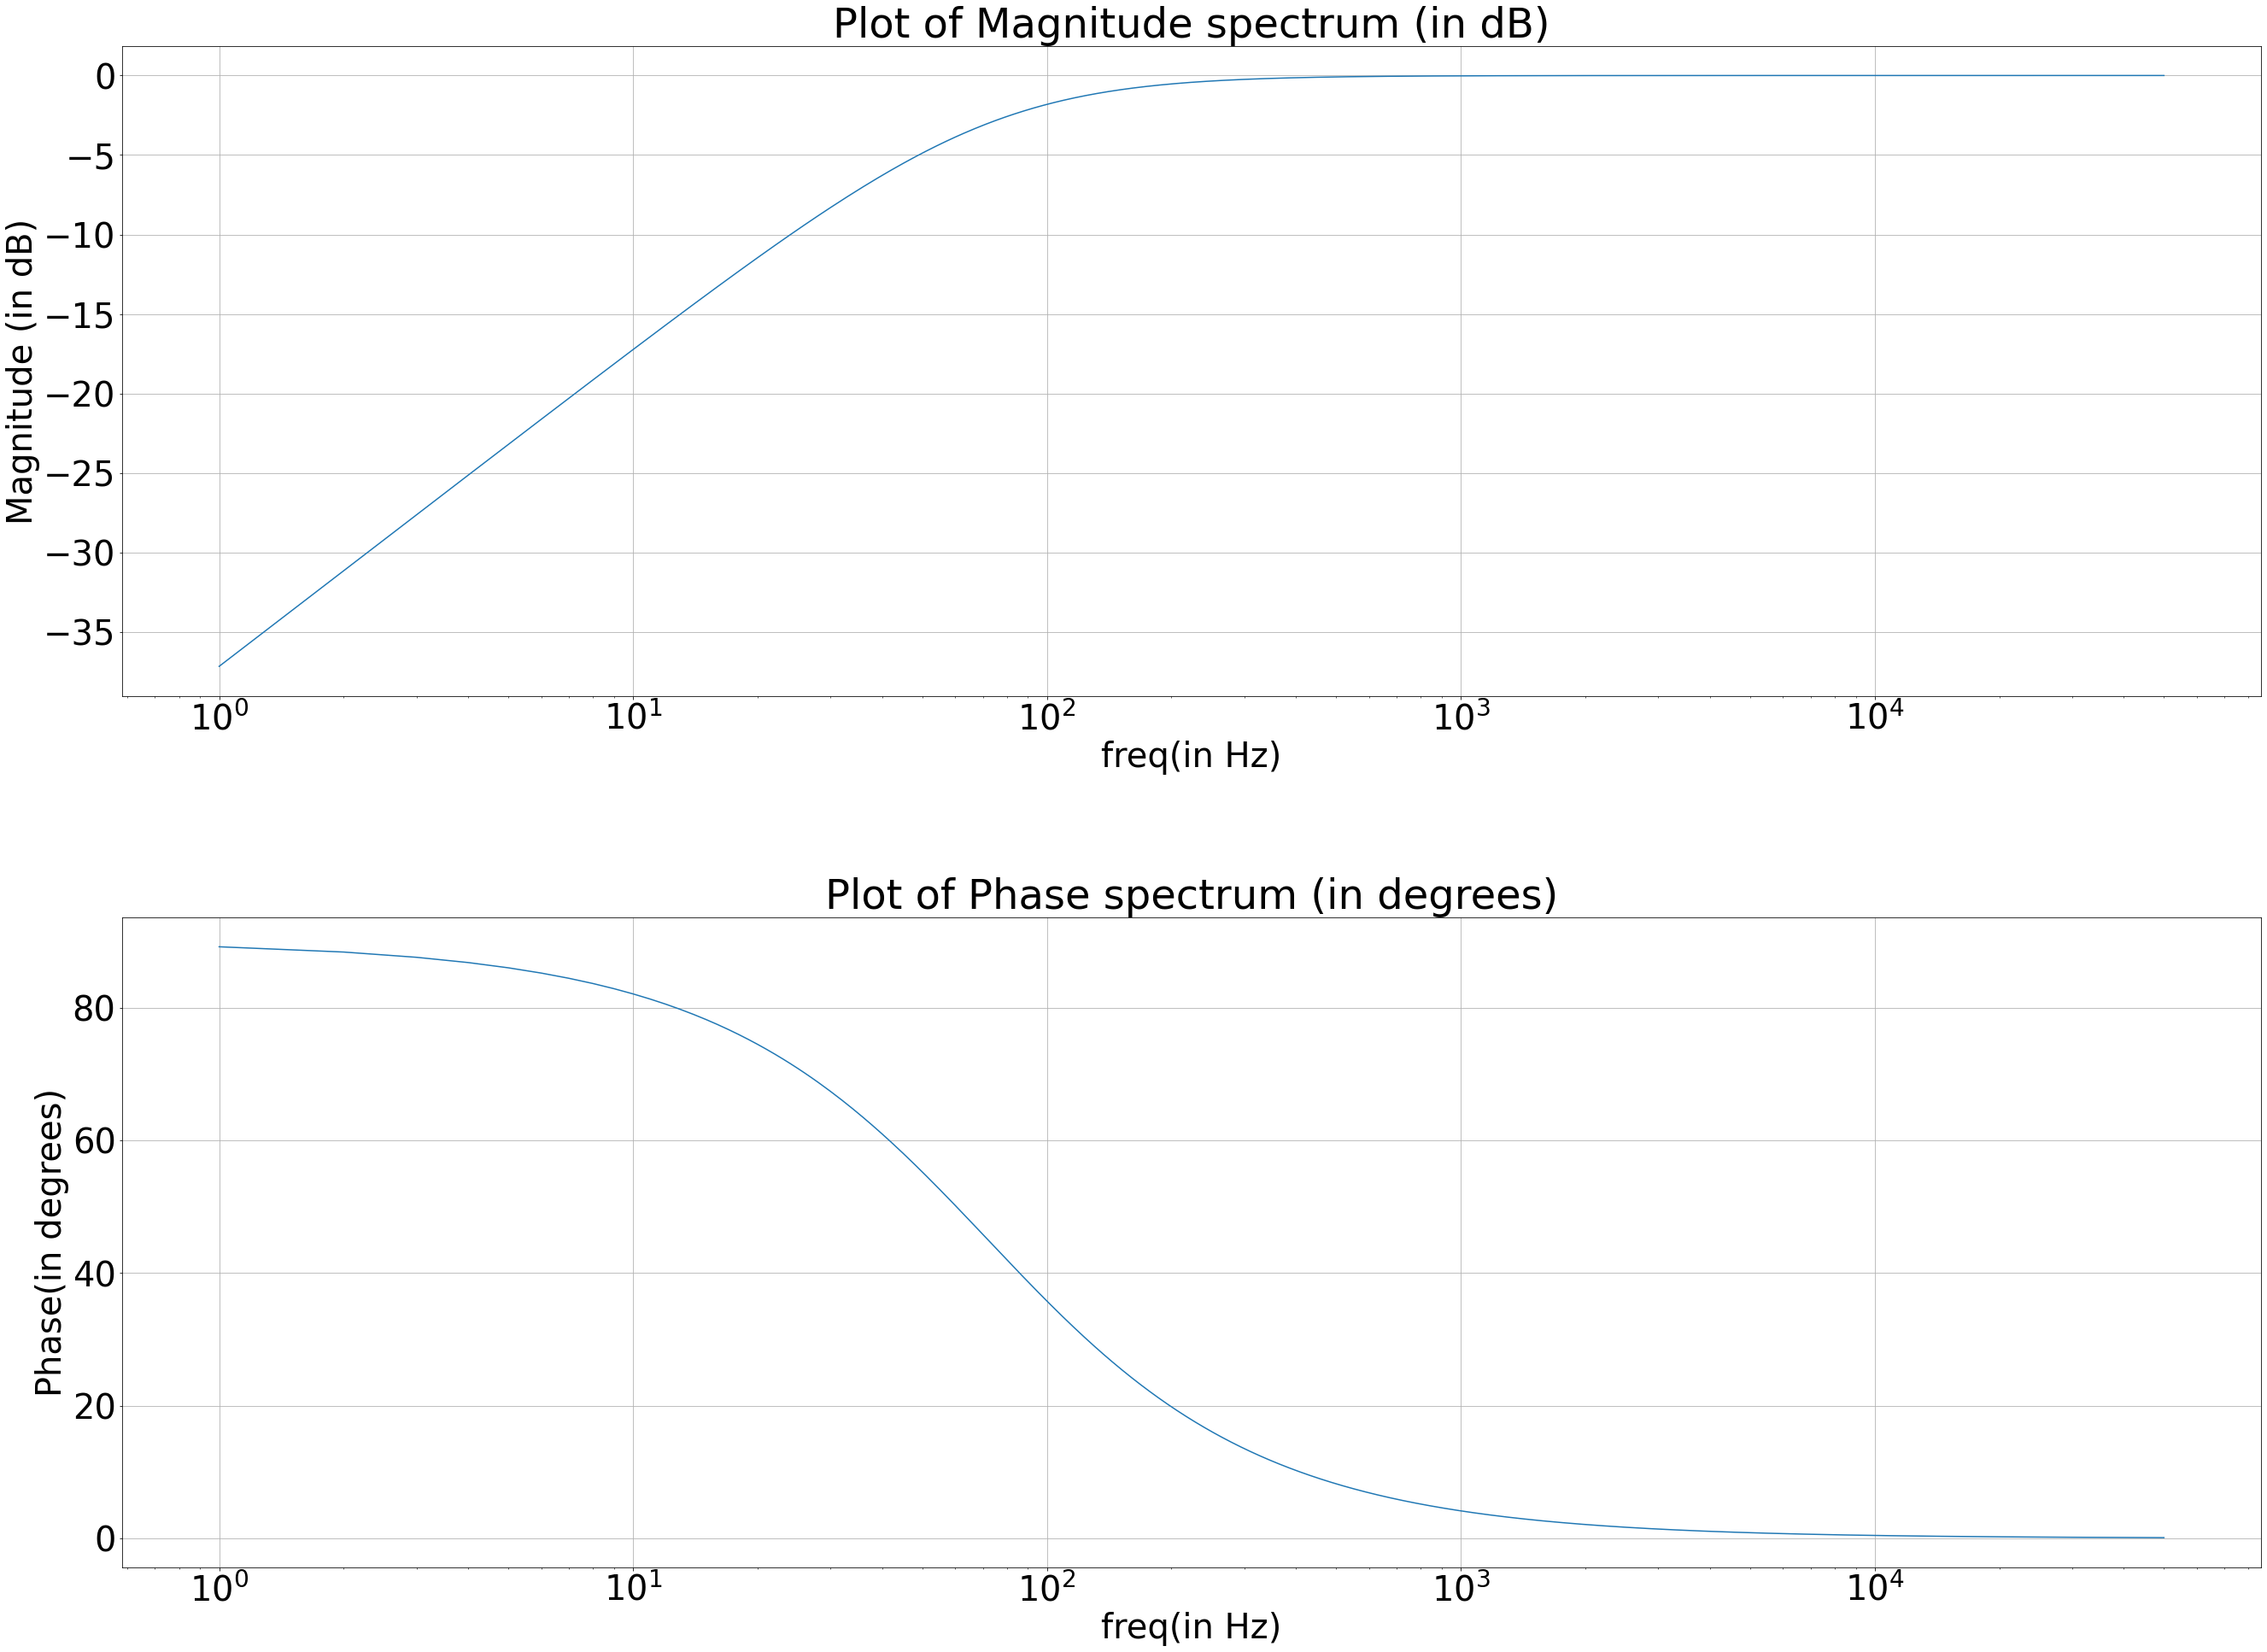

In [94]:
# Plotting the magnitude and phase spectra

matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(2,figsize=(40,30))

ax[0].plot(f,mag_H)
ax[0].set_xscale('log')
ax[0].set_xlabel('freq(in Hz)')
ax[0].set_ylabel('Magnitude (in dB)')
ax[0].set_title('Plot of Magnitude spectrum (in dB)')
ax[0].grid()

ax[1].plot(f,ph_H)
ax[1].set_xscale('log')
ax[1].set_xlabel('freq(in Hz)')
ax[1].set_ylabel('Phase(in degrees)')
ax[1].set_title('Plot of Phase spectrum (in degrees)')
ax[1].grid()
fig.tight_layout(pad=3.0)

Inference:
Based on the magnitude response, above filter is a high pass filter

In [95]:
f1 = 100.00 #in Hz
f2 = 10000.00 # in Hz


# Input voltage, Vi=10V => Output voltage, Vo=Transfer function*Vi

Vi = 10
Vo = H*Vi
Vo_1 = np.round(np.abs(Vo[f==f1][0]),4)  # Output voltage at freq=100Hz
Vo_2 = np.round(np.abs(Vo[f==f2][0]),4)  # Output voltage at freq=10000Hz
print(f'The output voltage of RC circuit at frequency, f={f1} is {Vo_1} V')
print(f'The output voltage of RC circuit at frequency, f={f2} is {Vo_2} V')

The output voltage of RC circuit at frequency, f=100.0 is 8.1135 V
The output voltage of RC circuit at frequency, f=10000.0 is 9.9997 V


In [96]:
# Calculation of cutoff frequency from the magnitude spectrum

index_3db = np.argmin(np.abs(mag_H+3))
f_3db = f[index_3db]
print(f'The cutoff frequency of given high pass RC filter is {f_3db} Hz (approx)')

The cutoff frequency of given high pass RC filter is 72 Hz (approx)


## (c) Design a second order low pass filter using RC circuit. Do the anal-ysis for R = 50K and C = 50nF. The input voltage waveform is10 sin 2pi*t. Plot the amplitude and frequency spectrum. 

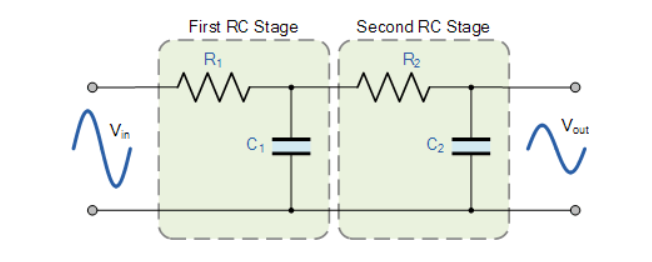

In [97]:
R = 50*(10**3) # in ohms
C = 50*(10**(-9)) # in Farads

# Transfer function = 1/(jwRC+1)^2

f = np.arange(0,50000,1)  # Freq in Hz
w = 2*np.pi*f             # Angular freq in rad/sec
H = 1/(1+(1j*w*R*C))**2   # Transfer function
mag_H = 20*np.log10(np.abs(H))   # Magnitude in dB
ph_H = np.angle(H,deg=True)      # Phase in degrees

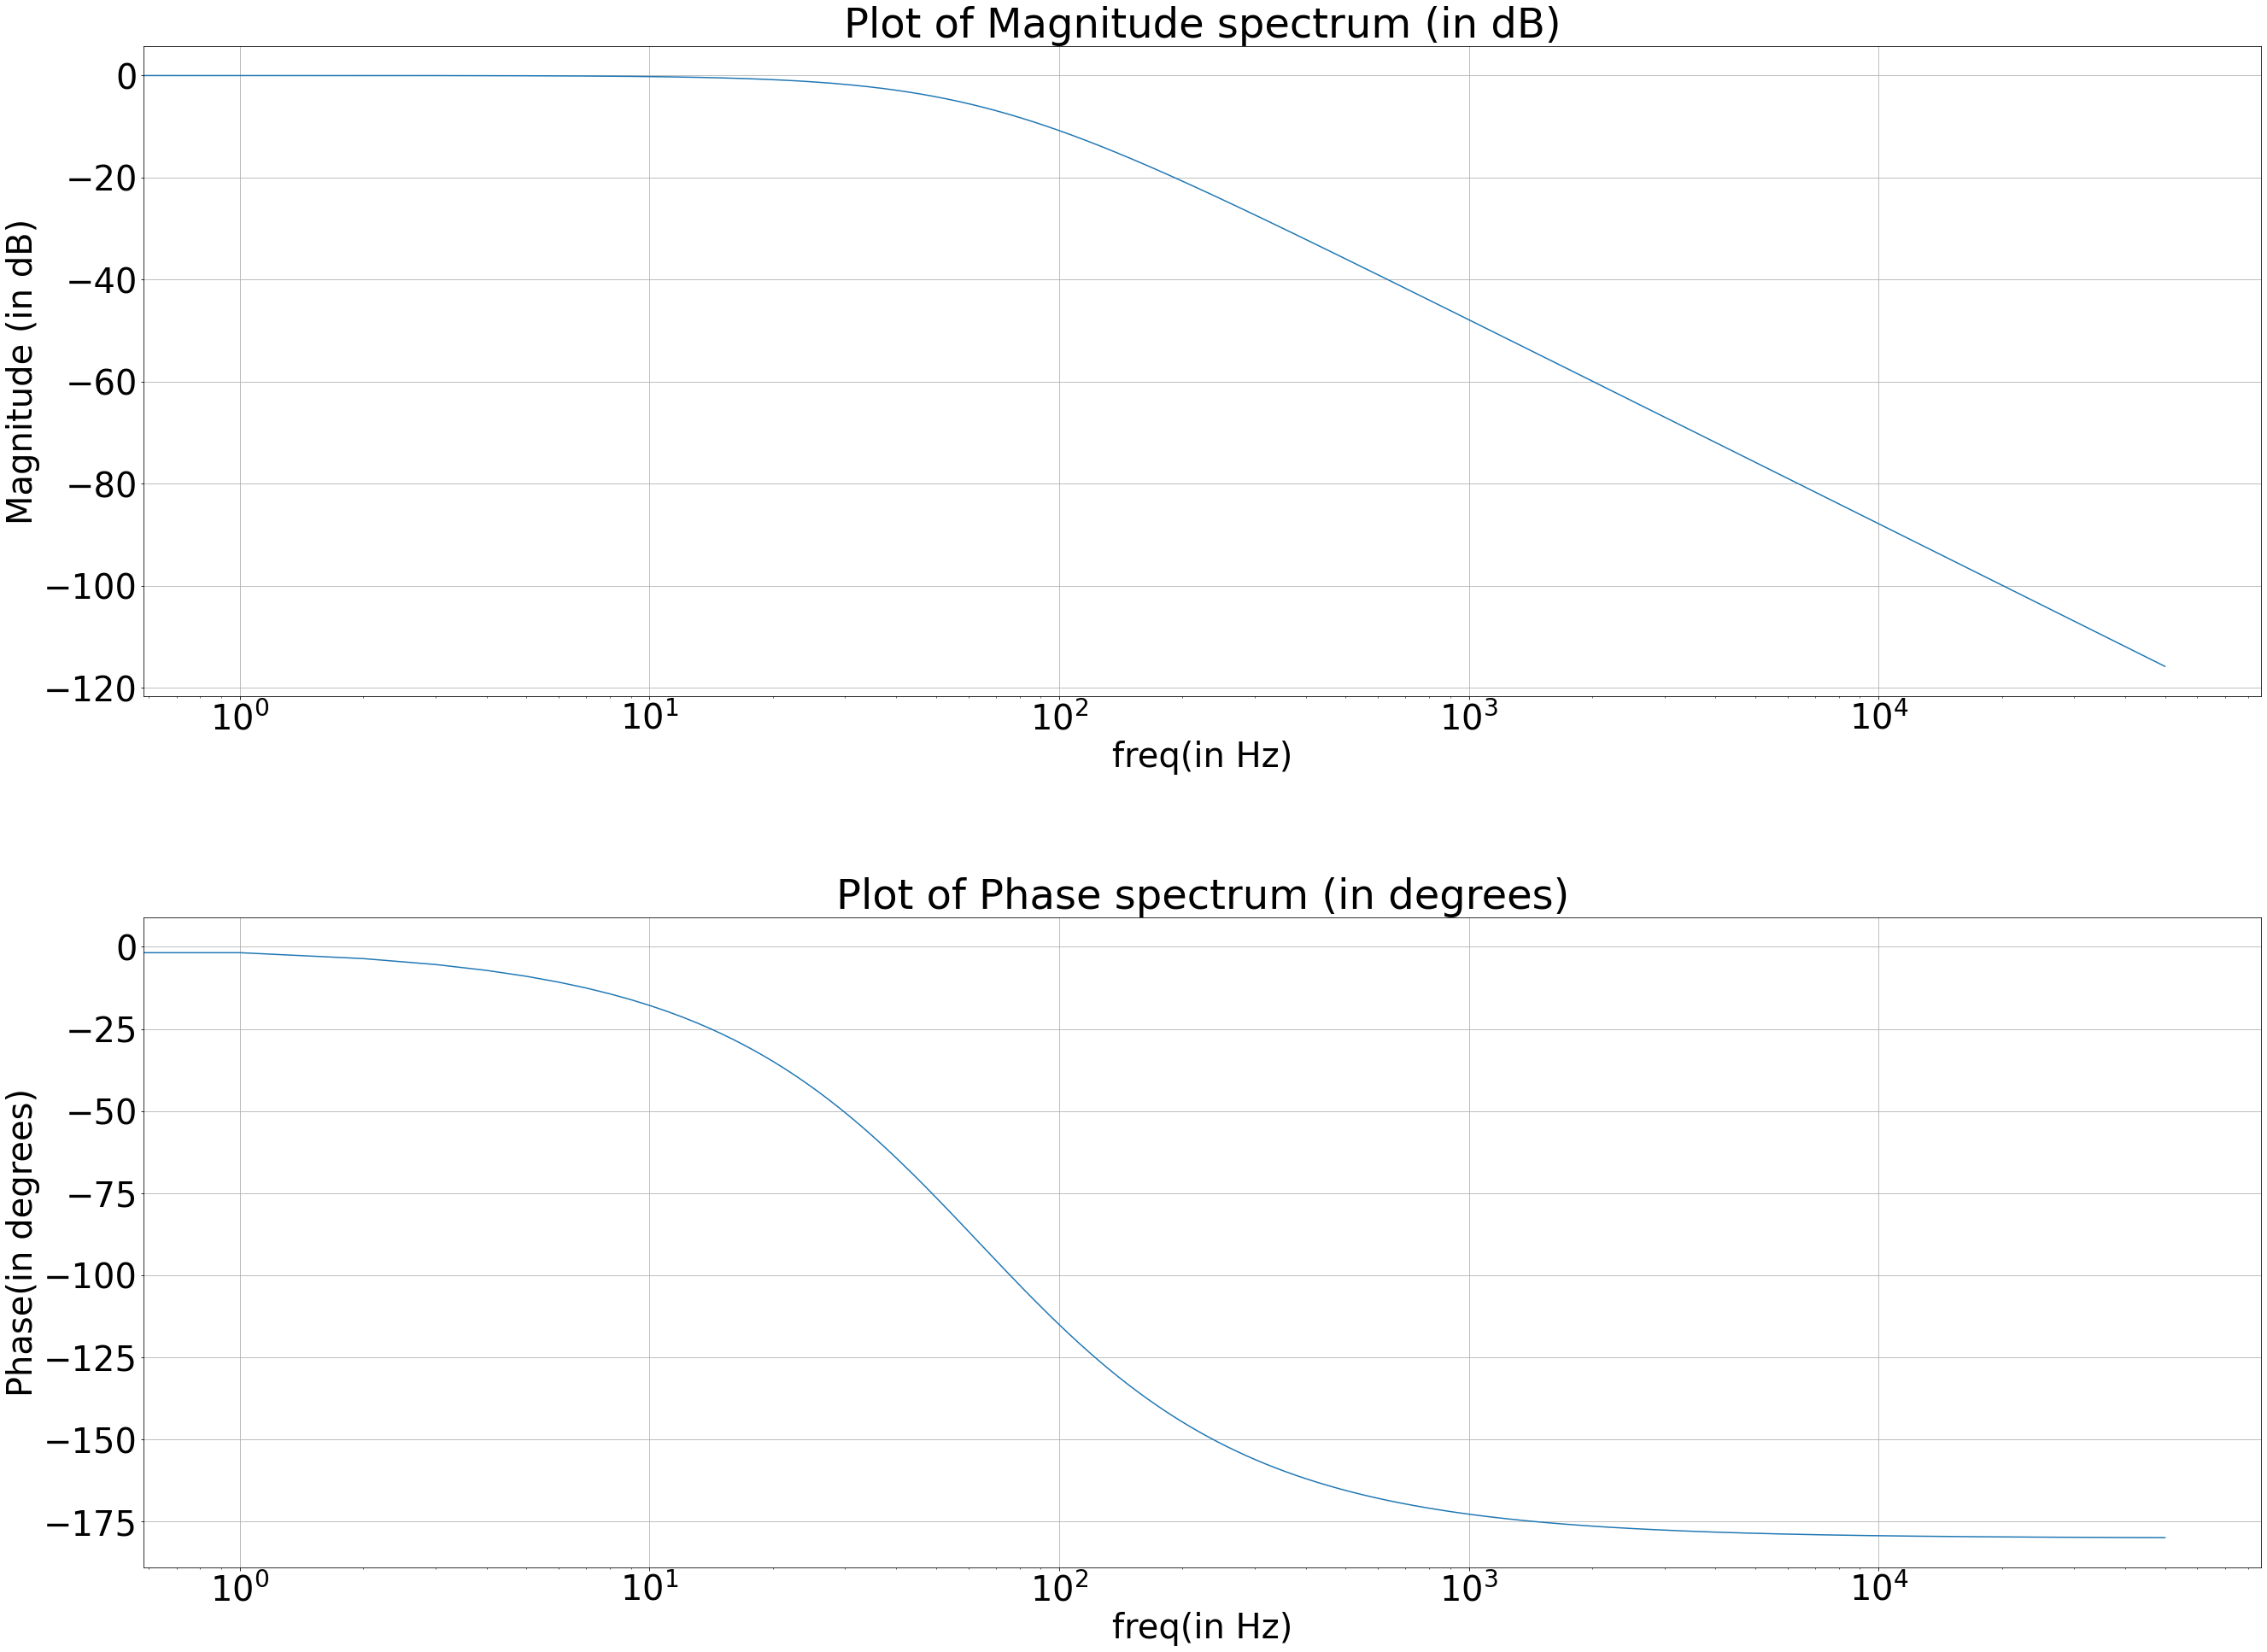

In [98]:
# Plotting the magnitude and phase spectra

matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(2,figsize=(40,30))

ax[0].plot(f,mag_H)
ax[0].set_xscale('log')
ax[0].set_xlabel('freq(in Hz)')
ax[0].set_ylabel('Magnitude (in dB)')
ax[0].set_title('Plot of Magnitude spectrum (in dB)')
ax[0].grid()

ax[1].plot(f,ph_H)
ax[1].set_xscale('log')
ax[1].set_xlabel('freq(in Hz)')
ax[1].set_ylabel('Phase(in degrees)')
ax[1].set_title('Plot of Phase spectrum (in degrees)')
ax[1].grid()
fig.tight_layout(pad=3.0)

In [99]:
f1 = 100.00 #in Hz
f2 = 10000.00 # in Hz


# Input voltage,Vi=10V => Output voltage, Vo=Transfer function*Vi

Vi = 10
Vo = H*Vi
Vo_1 = np.round(np.abs(Vo[f==f1][0]),4)  # Output voltage at freq=100Hz
Vo_2 = np.round(np.abs(Vo[f==f2][0]),4)  # Output voltage at freq=10000Hz
print(f'The output voltage of RC circuit at frequency, f={f1} is {Vo_1} V')
print(f'The output voltage of RC circuit at frequency, f={f2} is {Vo_2} V')

The output voltage of RC circuit at frequency, f=100.0 is 2.884 V
The output voltage of RC circuit at frequency, f=10000.0 is 0.0004 V


In [100]:
# Calculation of cutoff frequency from the magnitude spectrum

index_3db = np.argmin(np.abs(mag_H+3))  
f_3db = f[index_3db]
print(f'The cutoff frequency of given high pass RC filter is {f_3db} Hz (approx)')

The cutoff frequency of given high pass RC filter is 41 Hz (approx)


## (d) Design a band pass filter using cascaded RC circuits. Make use of the values of the 2 resistors as 20K. The filter should pass all the frequencies between 1kHz and 30kHz. Find the transfer function of the same and plot the magnitude and amplitude of the filter. 

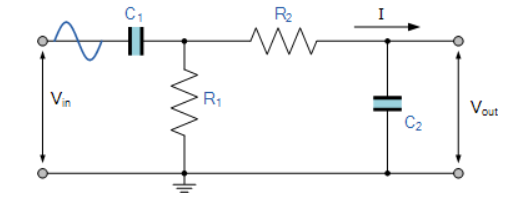

In [101]:
# R1 = R2 = R
R = 20*(10**3) # in ohms
f_L = 1*(10**3) # Lower cutoff freq in Hz
f_H = 30*(10**3) # Upper cutoff freq in Hz

# C1 = 1/(2pi*f_L*R)
# C2 = 1/(2pi*f_H*R)

C1 = 1/(2*np.pi*f_L*R)  # in Farads
C2 = 1/(2*np.pi*f_H*R)  # in Farads

# Transfer function = (jwRC1/(jWRC1+1))*(1/(jwRC2+1))

f = np.arange(1,100000000,1000)   # Freq in Hz
w = 2*np.pi*f                     # Ang freq in rad/sec
H = ((1j*w*R*C1)/((1j*w*R*C1)+1))*(1/((1j*w*R*C2)+1))   # Transfer function
mag_H = 20*np.log10(np.abs(H))  # Magnitude in dB
ph_H = np.angle(H,deg=True)     # Phase in degrees

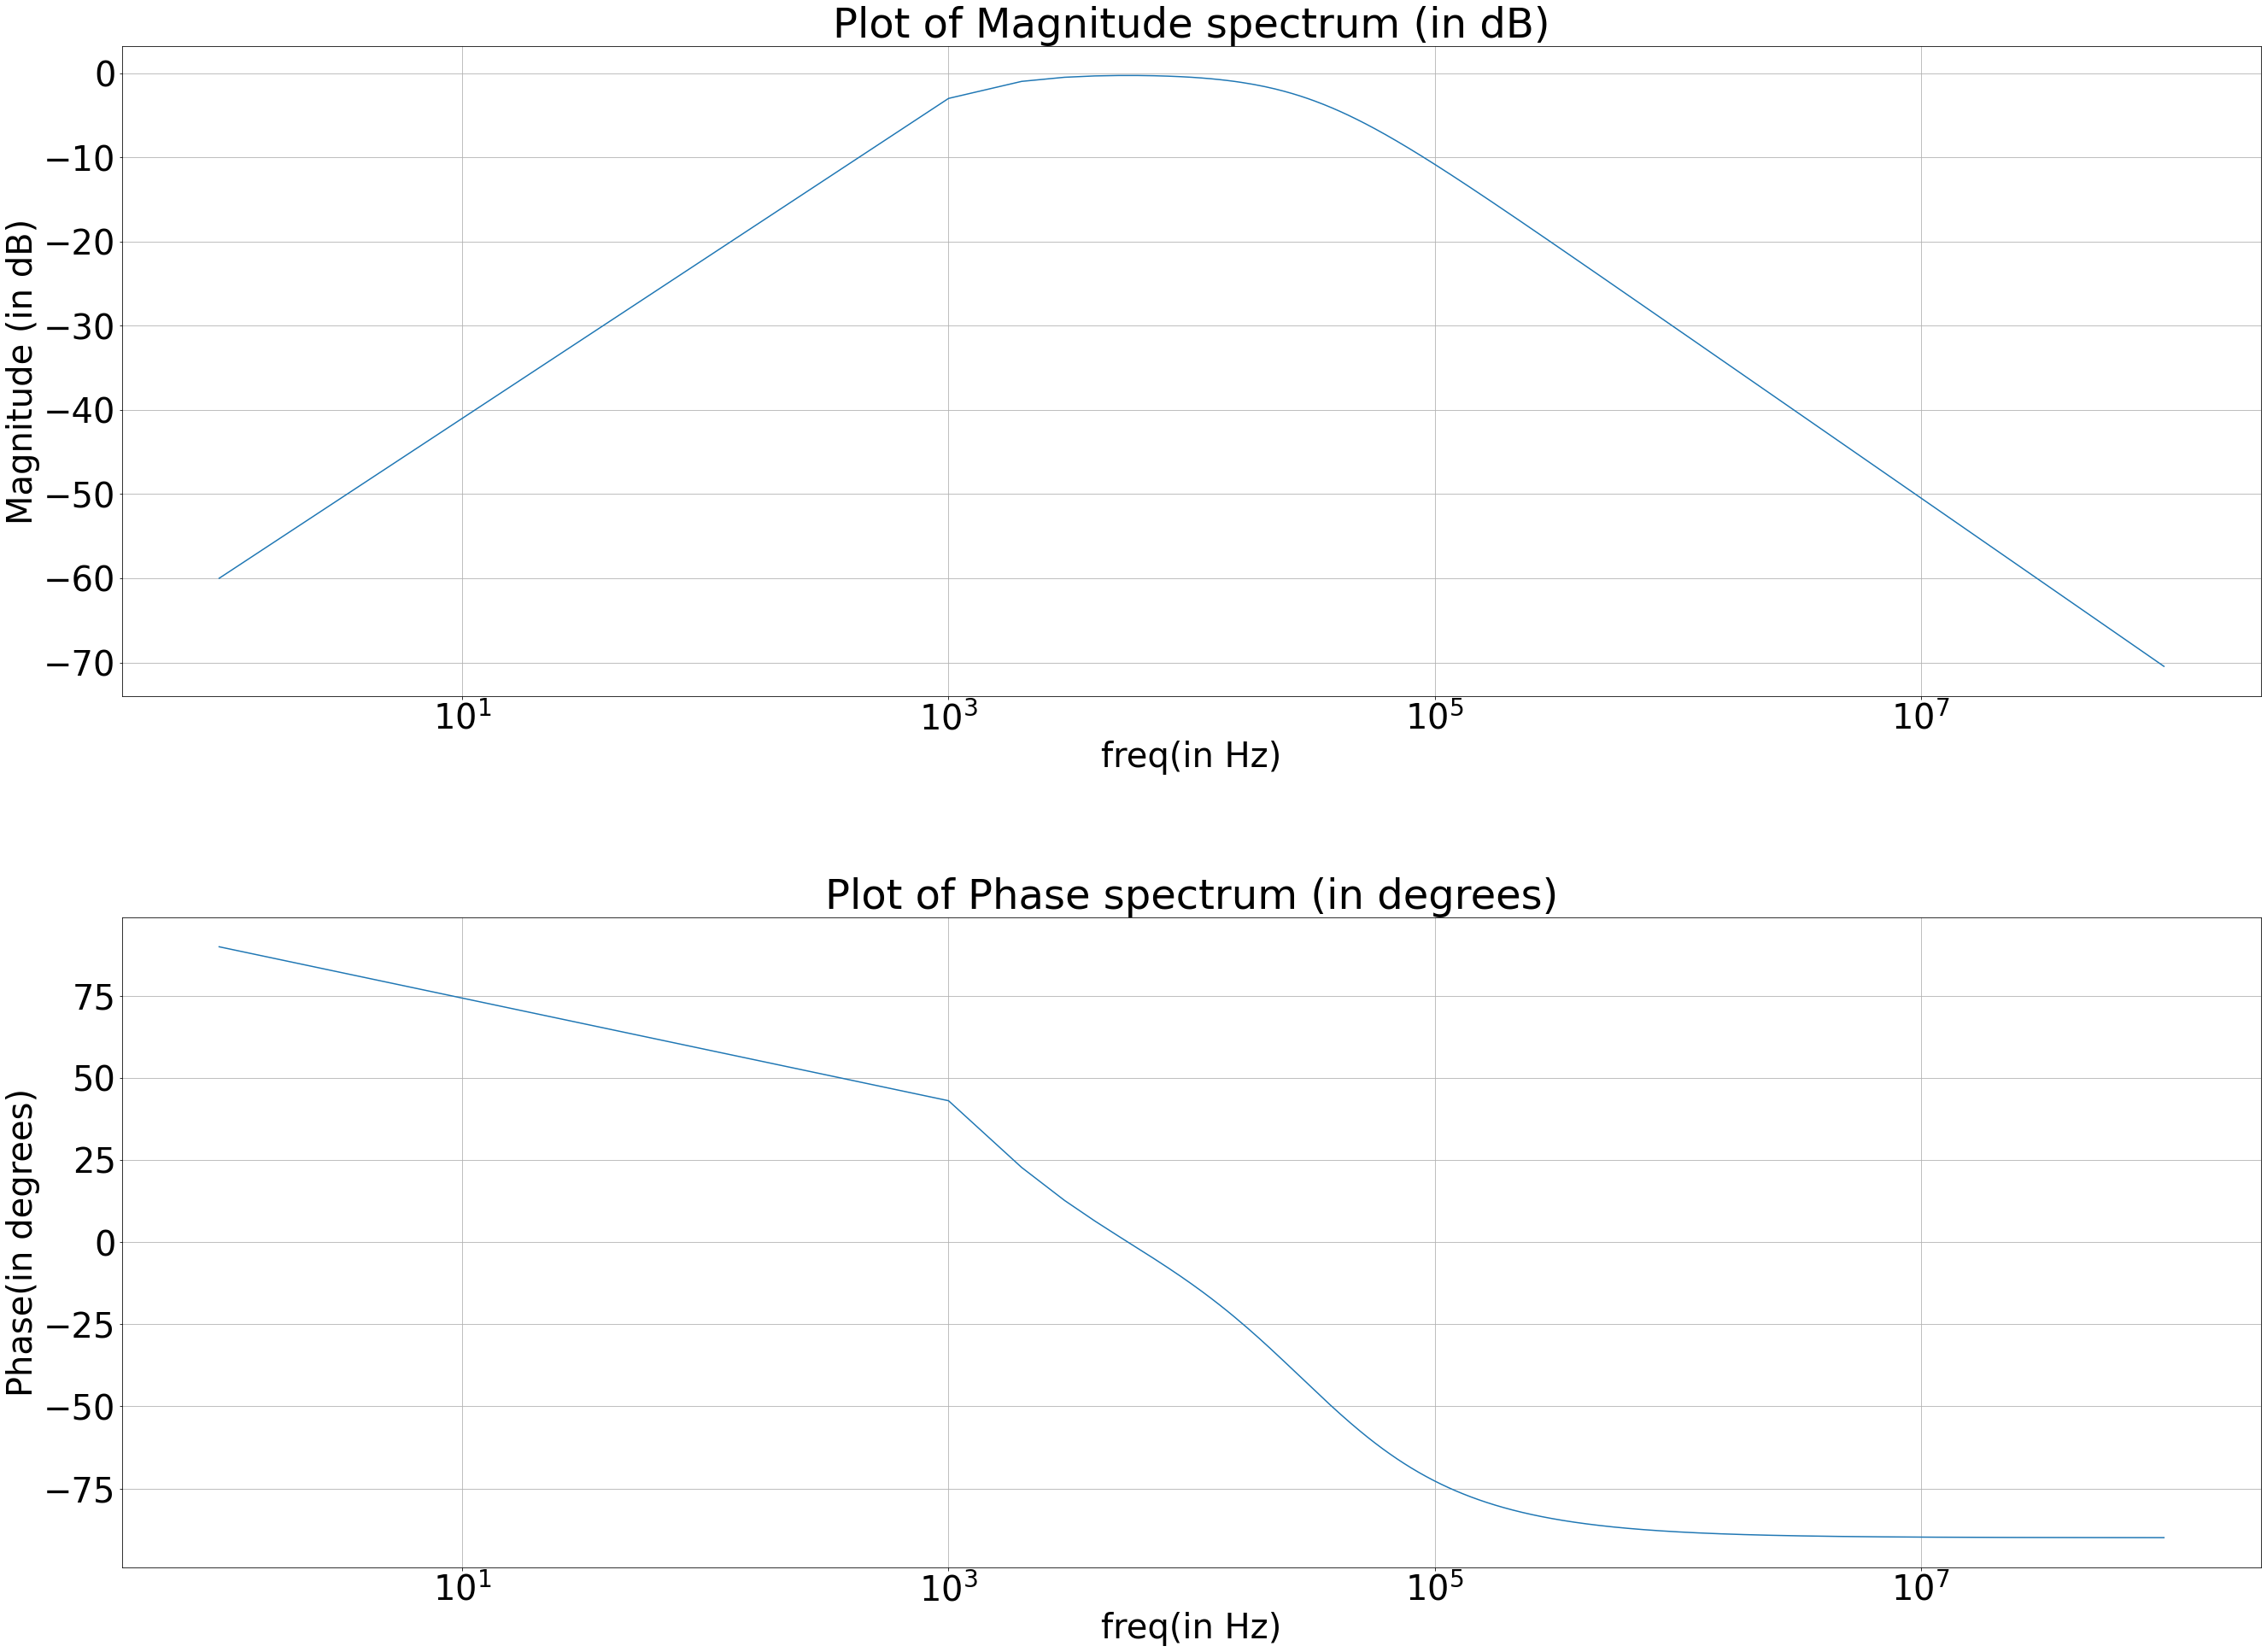

In [102]:
# Plotting the magnitude and phase plots

matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(2,figsize=(40,30))

ax[0].plot(f,mag_H)
ax[0].set_xscale('log')
ax[0].set_xlabel('freq(in Hz)')
ax[0].set_ylabel('Magnitude (in dB)')
ax[0].set_title('Plot of Magnitude spectrum (in dB)')
ax[0].grid()

ax[1].plot(f,ph_H)
ax[1].set_xscale('log')
ax[1].set_xlabel('freq(in Hz)')
ax[1].set_ylabel('Phase(in degrees)')
ax[1].set_title('Plot of Phase spectrum (in degrees)')
ax[1].grid()
fig.tight_layout(pad=3.0)

# 2. Digital filters

## (a) Consider the difference equation: y[n] = x[n] + x[n-1]. Find the output of the system to the sequence: x[n] = {1; 2; 3; 4; 5; 6; 7; 8; 9; 10}. What kind of filter is this? Compute the transfer function to plot the frequency and amplitude plots to verify your claim. Consider the sinusoidal input to the filter with unit amplitude. Take the sampling rate to be 1 Hz. Find and plot the filter output.

In [103]:
x_list = [1,2,3,4,5,6,7,8,9,10]
x = np.array(x_list)
delay = 1
x_delayed = np.roll(x,delay)
x_delayed[0:delay] = 0
y = x+x_delayed
y_list = y.tolist()
print(f'The output of the filter is y = {y_list}')

The output of the filter is y = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


Given filter is a Low pass filter

In [104]:
# Transfer function = 1+z^(-1) = 1+exp(-jw)
  
w = np.arange(0.001,np.pi,0.001)                # Ang freq in rad/sample     
H = 1+np.exp(-1j*w)
mag_H = 20*np.log10(np.abs(H))  # Magnitude in dB
ph_H = np.angle(H,deg=True)     # Phase in degrees

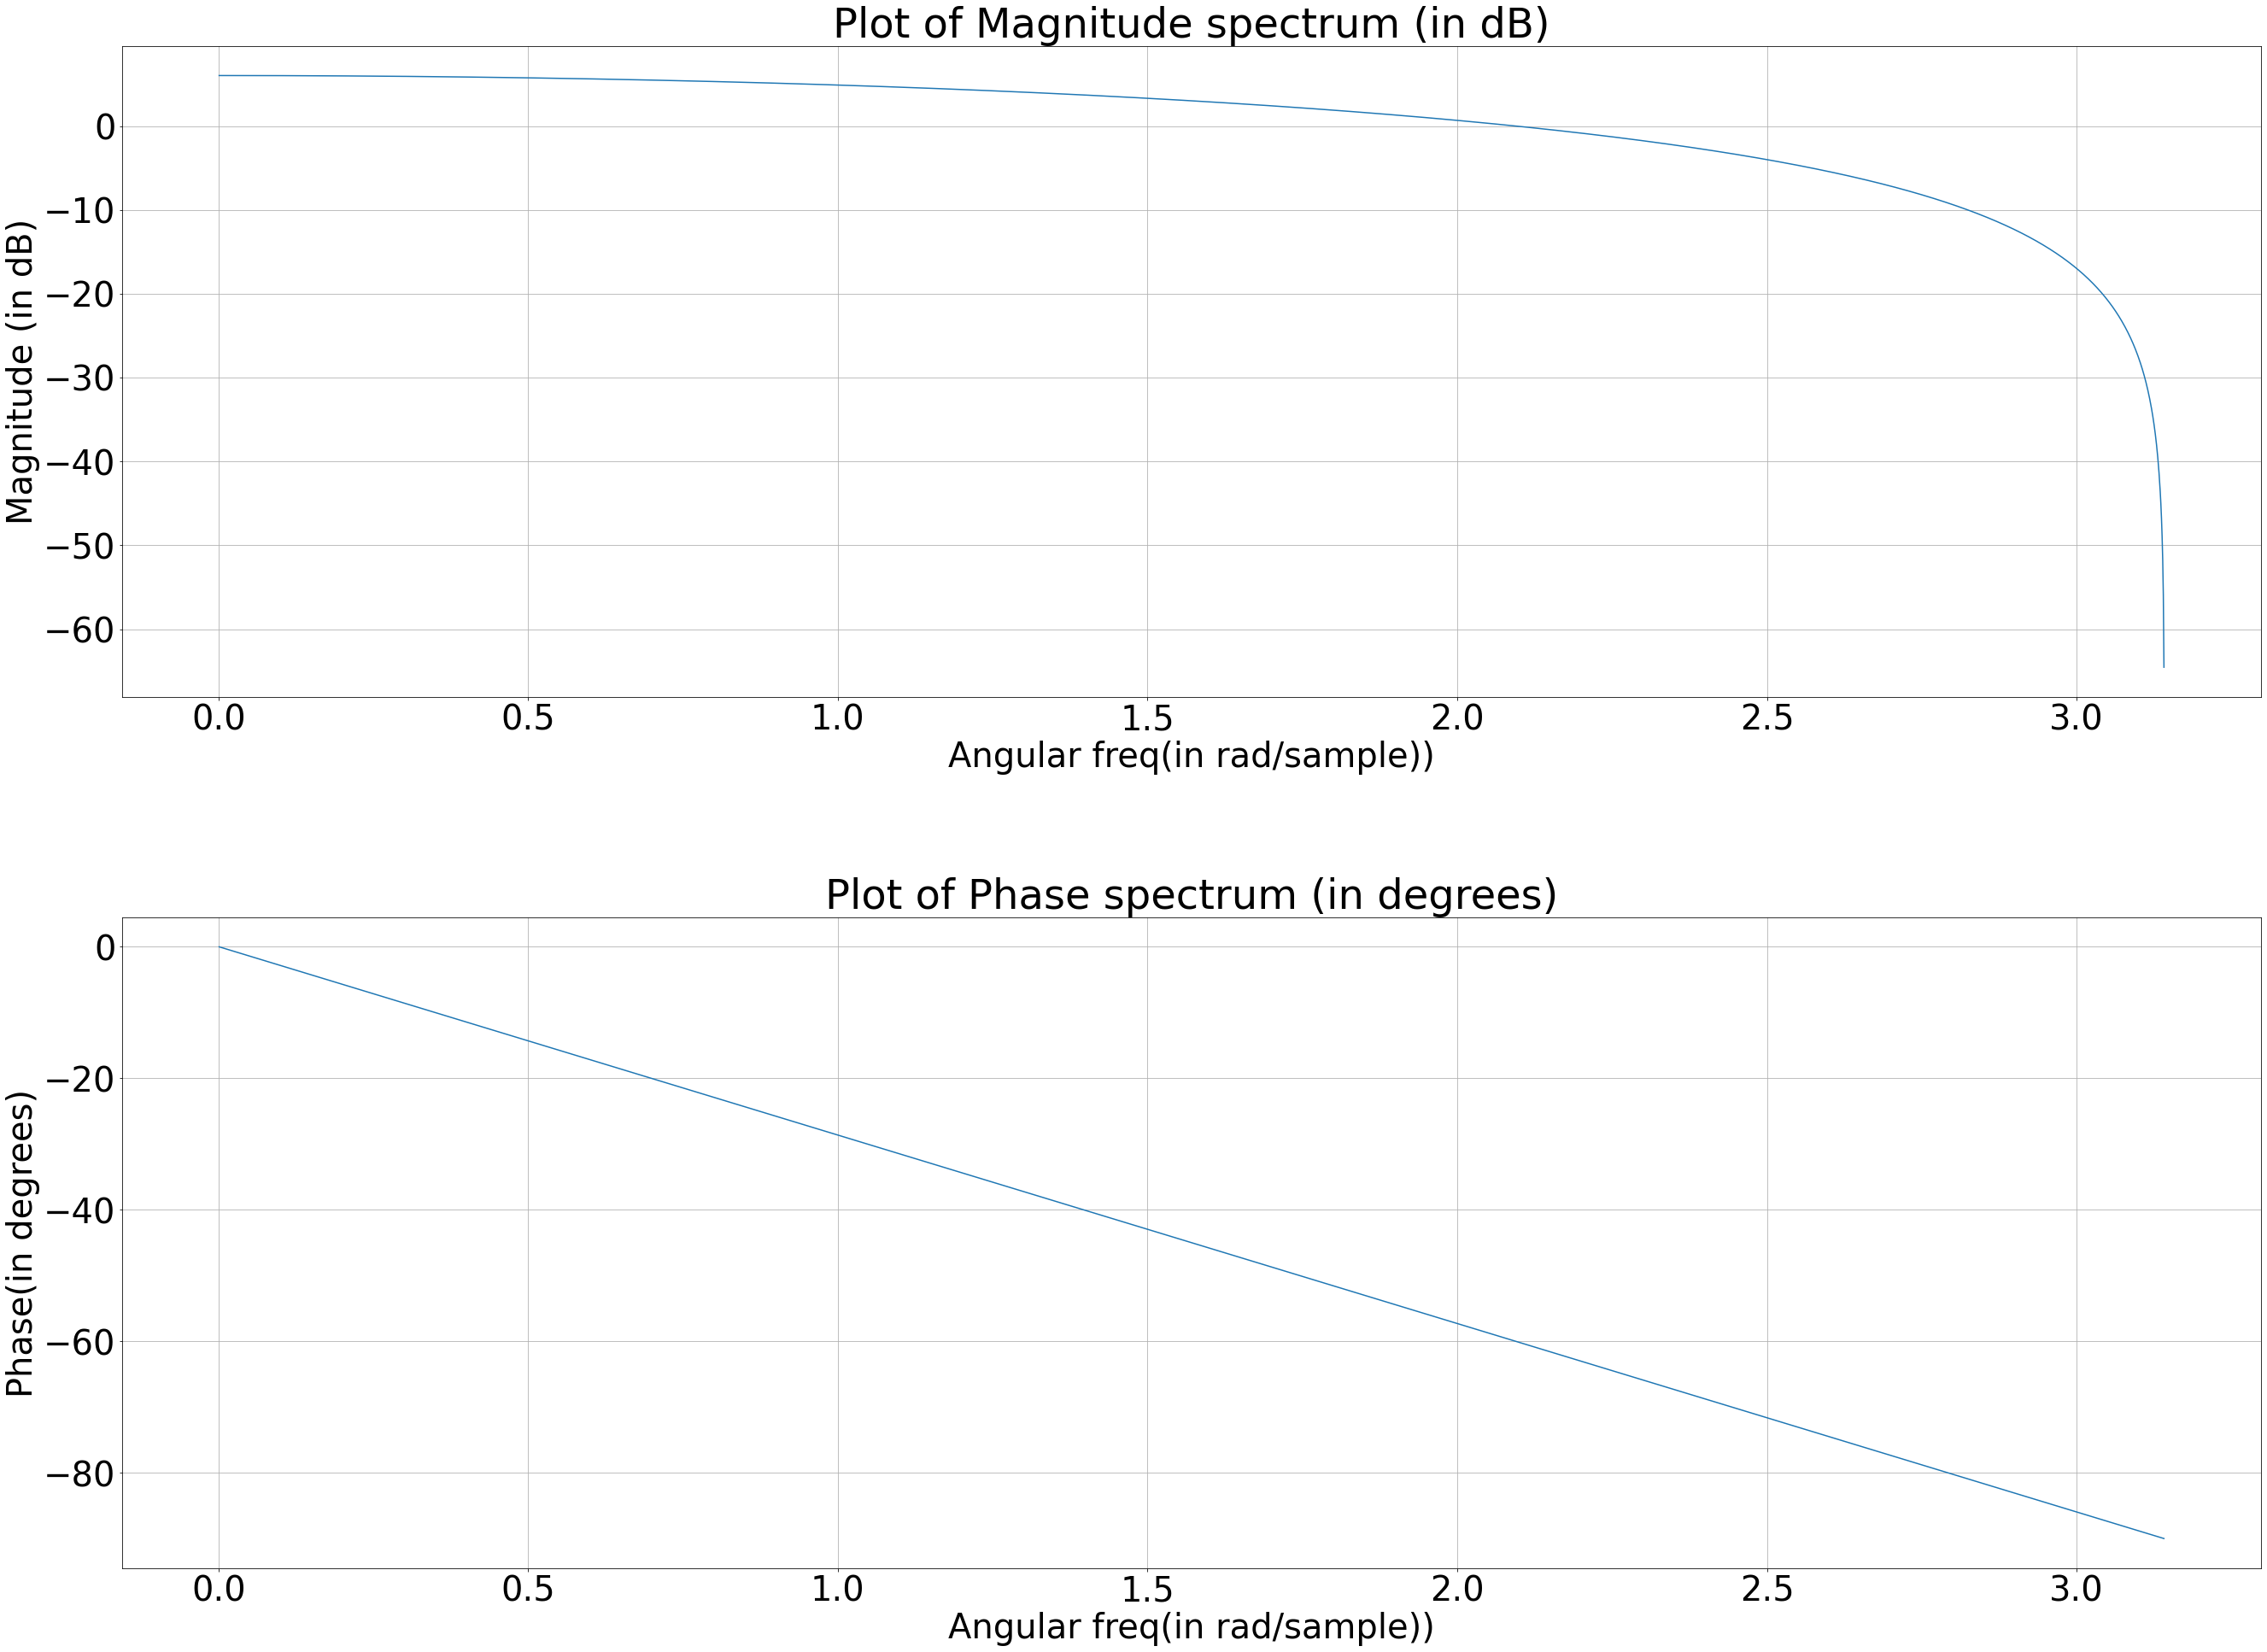

In [105]:
# Plotting the magnitude and phase plots

matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(2,figsize=(40,30))

ax[0].plot(w,mag_H)
ax[0].set_xlabel('Angular freq(in rad/sample))')
ax[0].set_ylabel('Magnitude (in dB)')
ax[0].set_title('Plot of Magnitude spectrum (in dB)')
ax[0].grid()

ax[1].plot(w,ph_H)
ax[1].set_xlabel('Angular freq(in rad/sample))')
ax[1].set_ylabel('Phase(in degrees)')
ax[1].set_title('Plot of Phase spectrum (in degrees)')
ax[1].grid()
fig.tight_layout(pad=3.0)

In [106]:
fs = 1 # Sampling frequency in Hz
n = np.arange(0,30,1/fs)
f = 1 # Frequency of sine signal
x = np.sin(f*n)
delay = 1
x_delayed = np.roll(x,delay)
y = np.round(x+x_delayed,2)
y_list = y.tolist()
print(f'The output of the filter to sinusoidal signal is y = {y_list}')

The output of the filter to sinusoidal signal is y = [-0.66, 0.84, 1.75, 1.05, -0.62, -1.72, -1.24, 0.38, 1.65, 1.4, -0.13, -1.54, -1.54, -0.12, 1.41, 1.64, 0.36, -1.25, -1.71, -0.6, 1.06, 1.75, 0.83, -0.86, -1.75, -1.04, 0.63, 1.72, 1.23, -0.39]


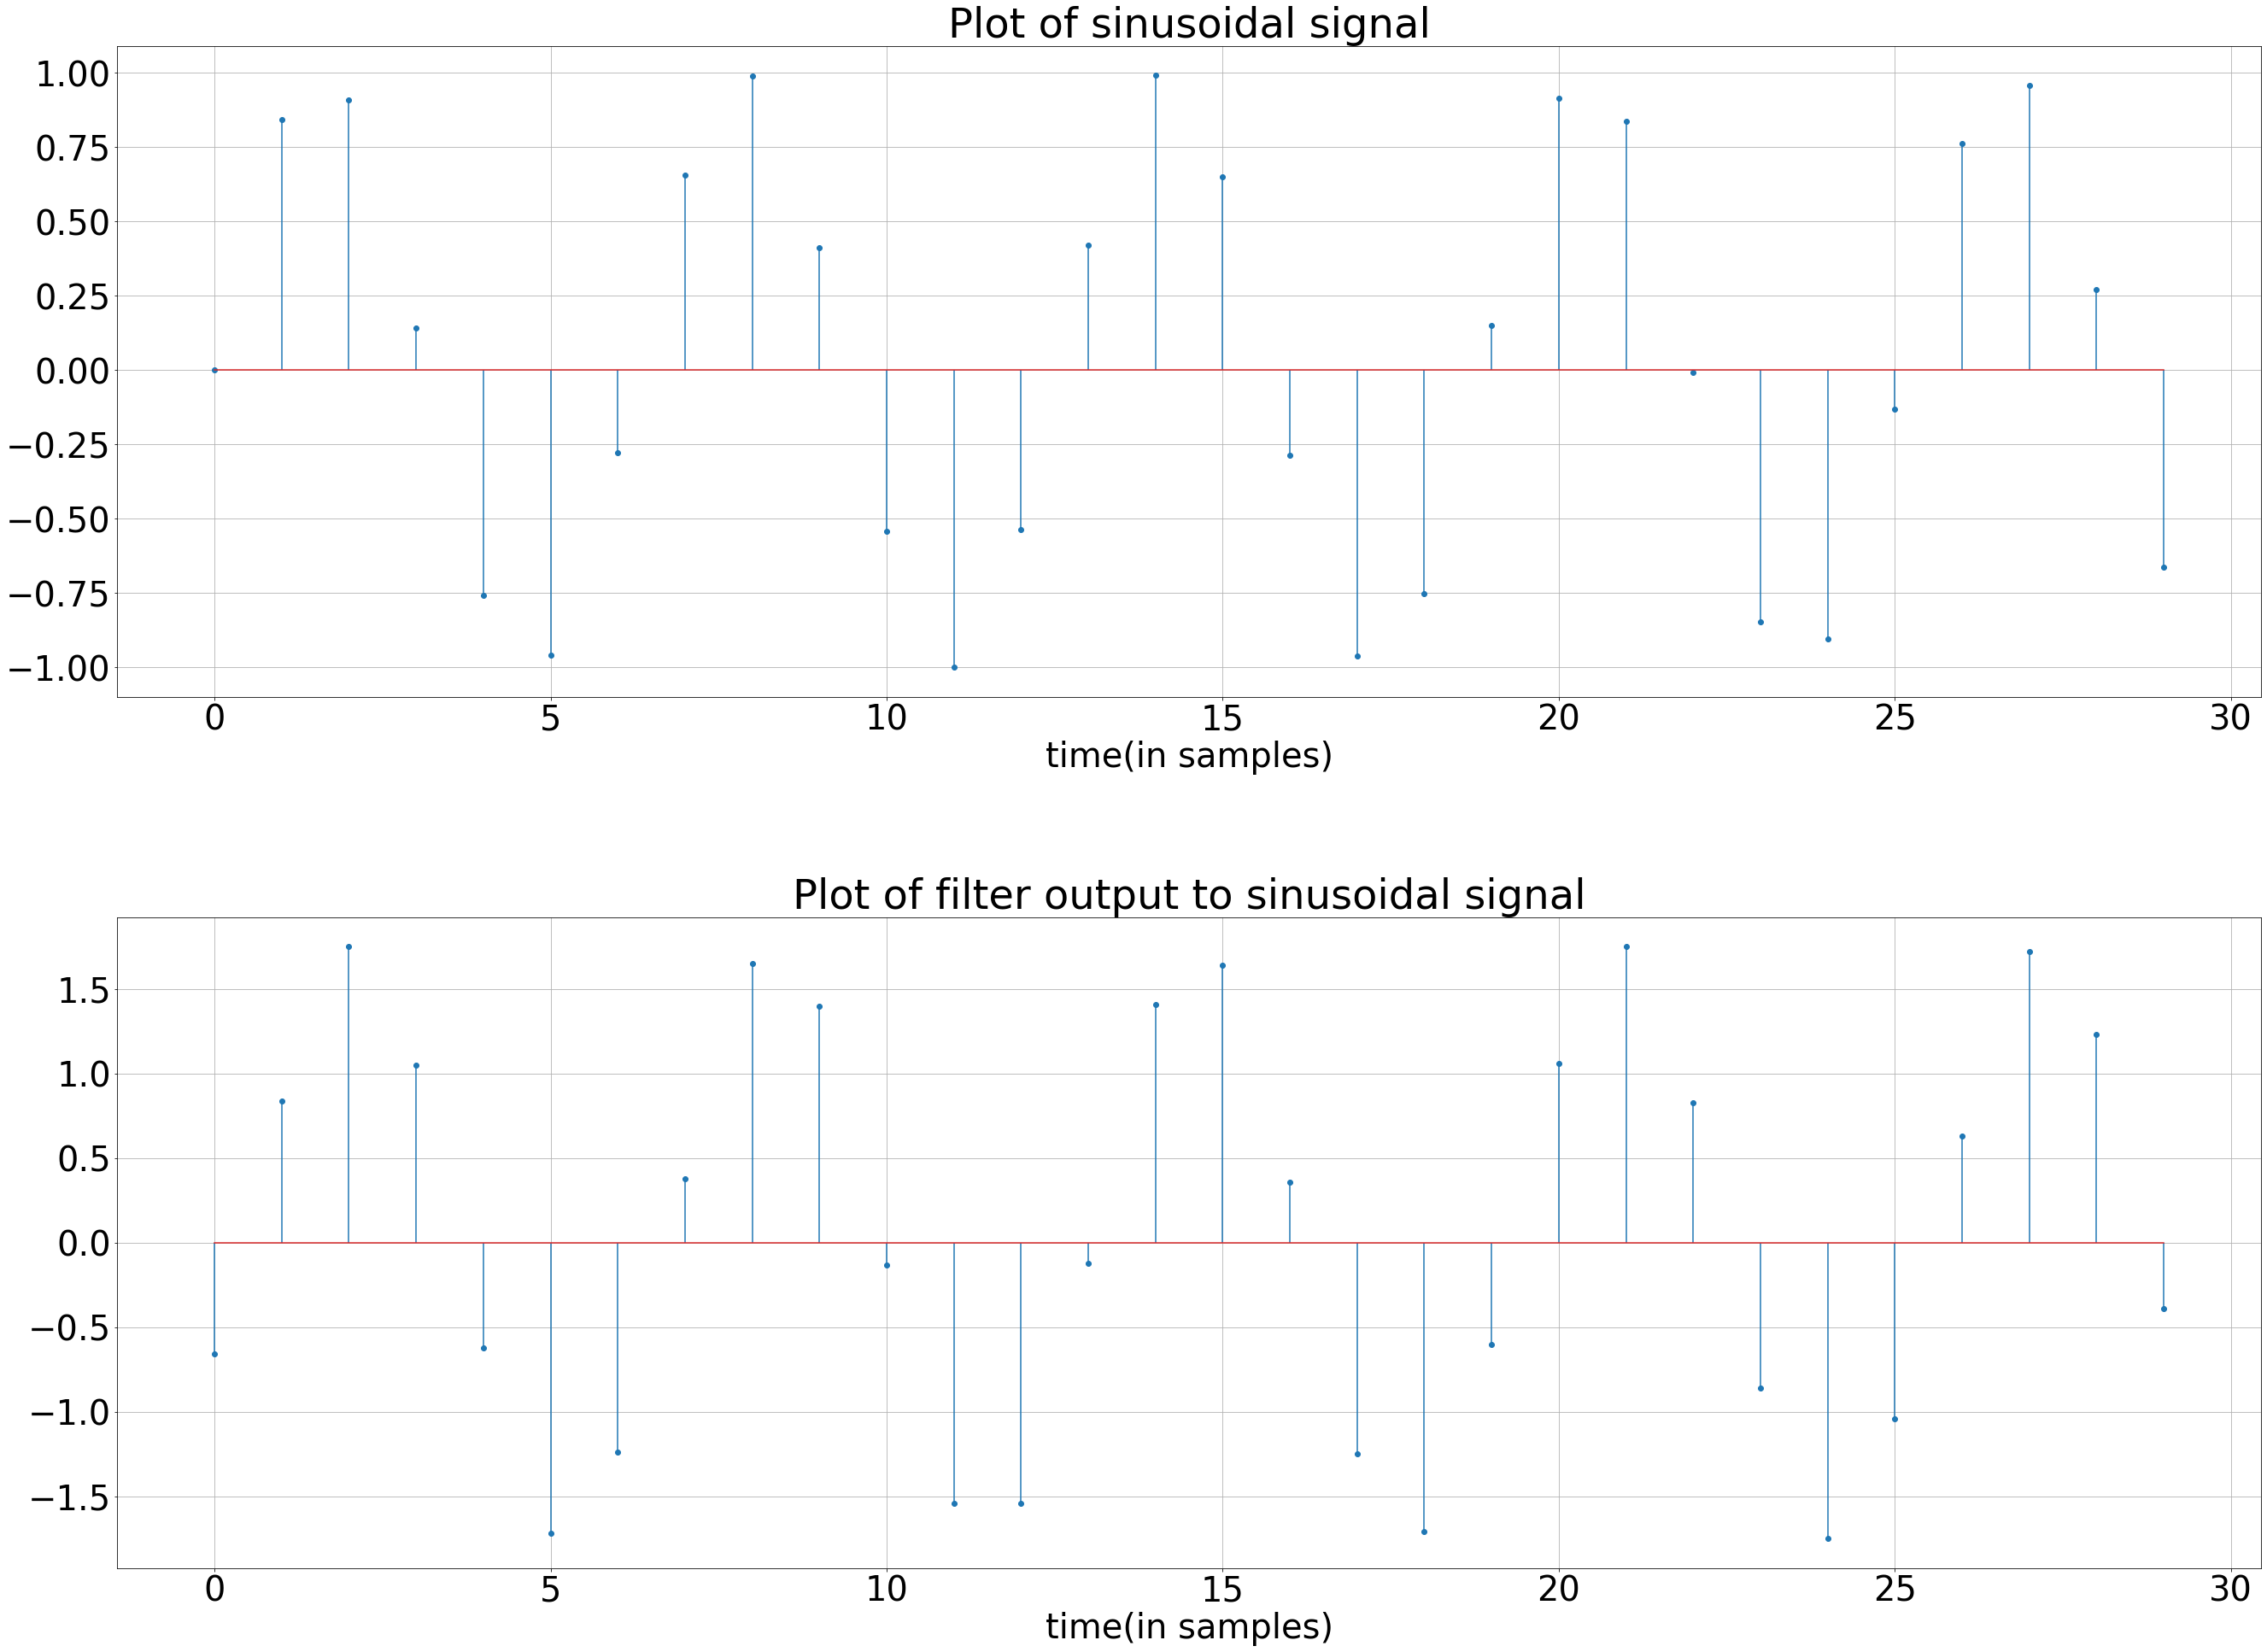

In [107]:
# Plotting the input and output signals

matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(2,figsize=(40,30))

ax[0].stem(n,x,use_line_collection=True)
ax[0].set_xlabel('time(in samples)')
ax[0].set_ylabel('')
ax[0].set_title('Plot of sinusoidal signal')
ax[0].grid()

ax[1].stem(n,y,use_line_collection=True)
ax[1].set_xlabel('time(in samples)')
ax[1].set_ylabel('')
ax[1].set_title('Plot of filter output to sinusoidal signal')
ax[1].grid()
fig.tight_layout(pad=3.0)


## (b) Consider the difference equation: y[n] = 1/3(x[n] + x[n-1] + x[n-2]). What is this filter called? Compute the transfer function to plot the frequency and amplitude spectrum. What are the applications of this filter?

This is a simple Moving average filter of order 2

In [108]:
# Transfer function = (1/3)*(1+z^(-1)+z^(-2)) = (1/3)*(1+exp(-jw)+exp(-2jw))

w = np.arange(0.001,np.pi,0.001)       # Ang freq in rad/sample
H = (1/3)*(1+np.exp(-1j*w)+np.exp(-1j*2*w))
mag_H = 20*np.log10(np.abs(H))   # Magnitude in dB
ph_H = np.angle(H,deg=True)     # Phase in degrees

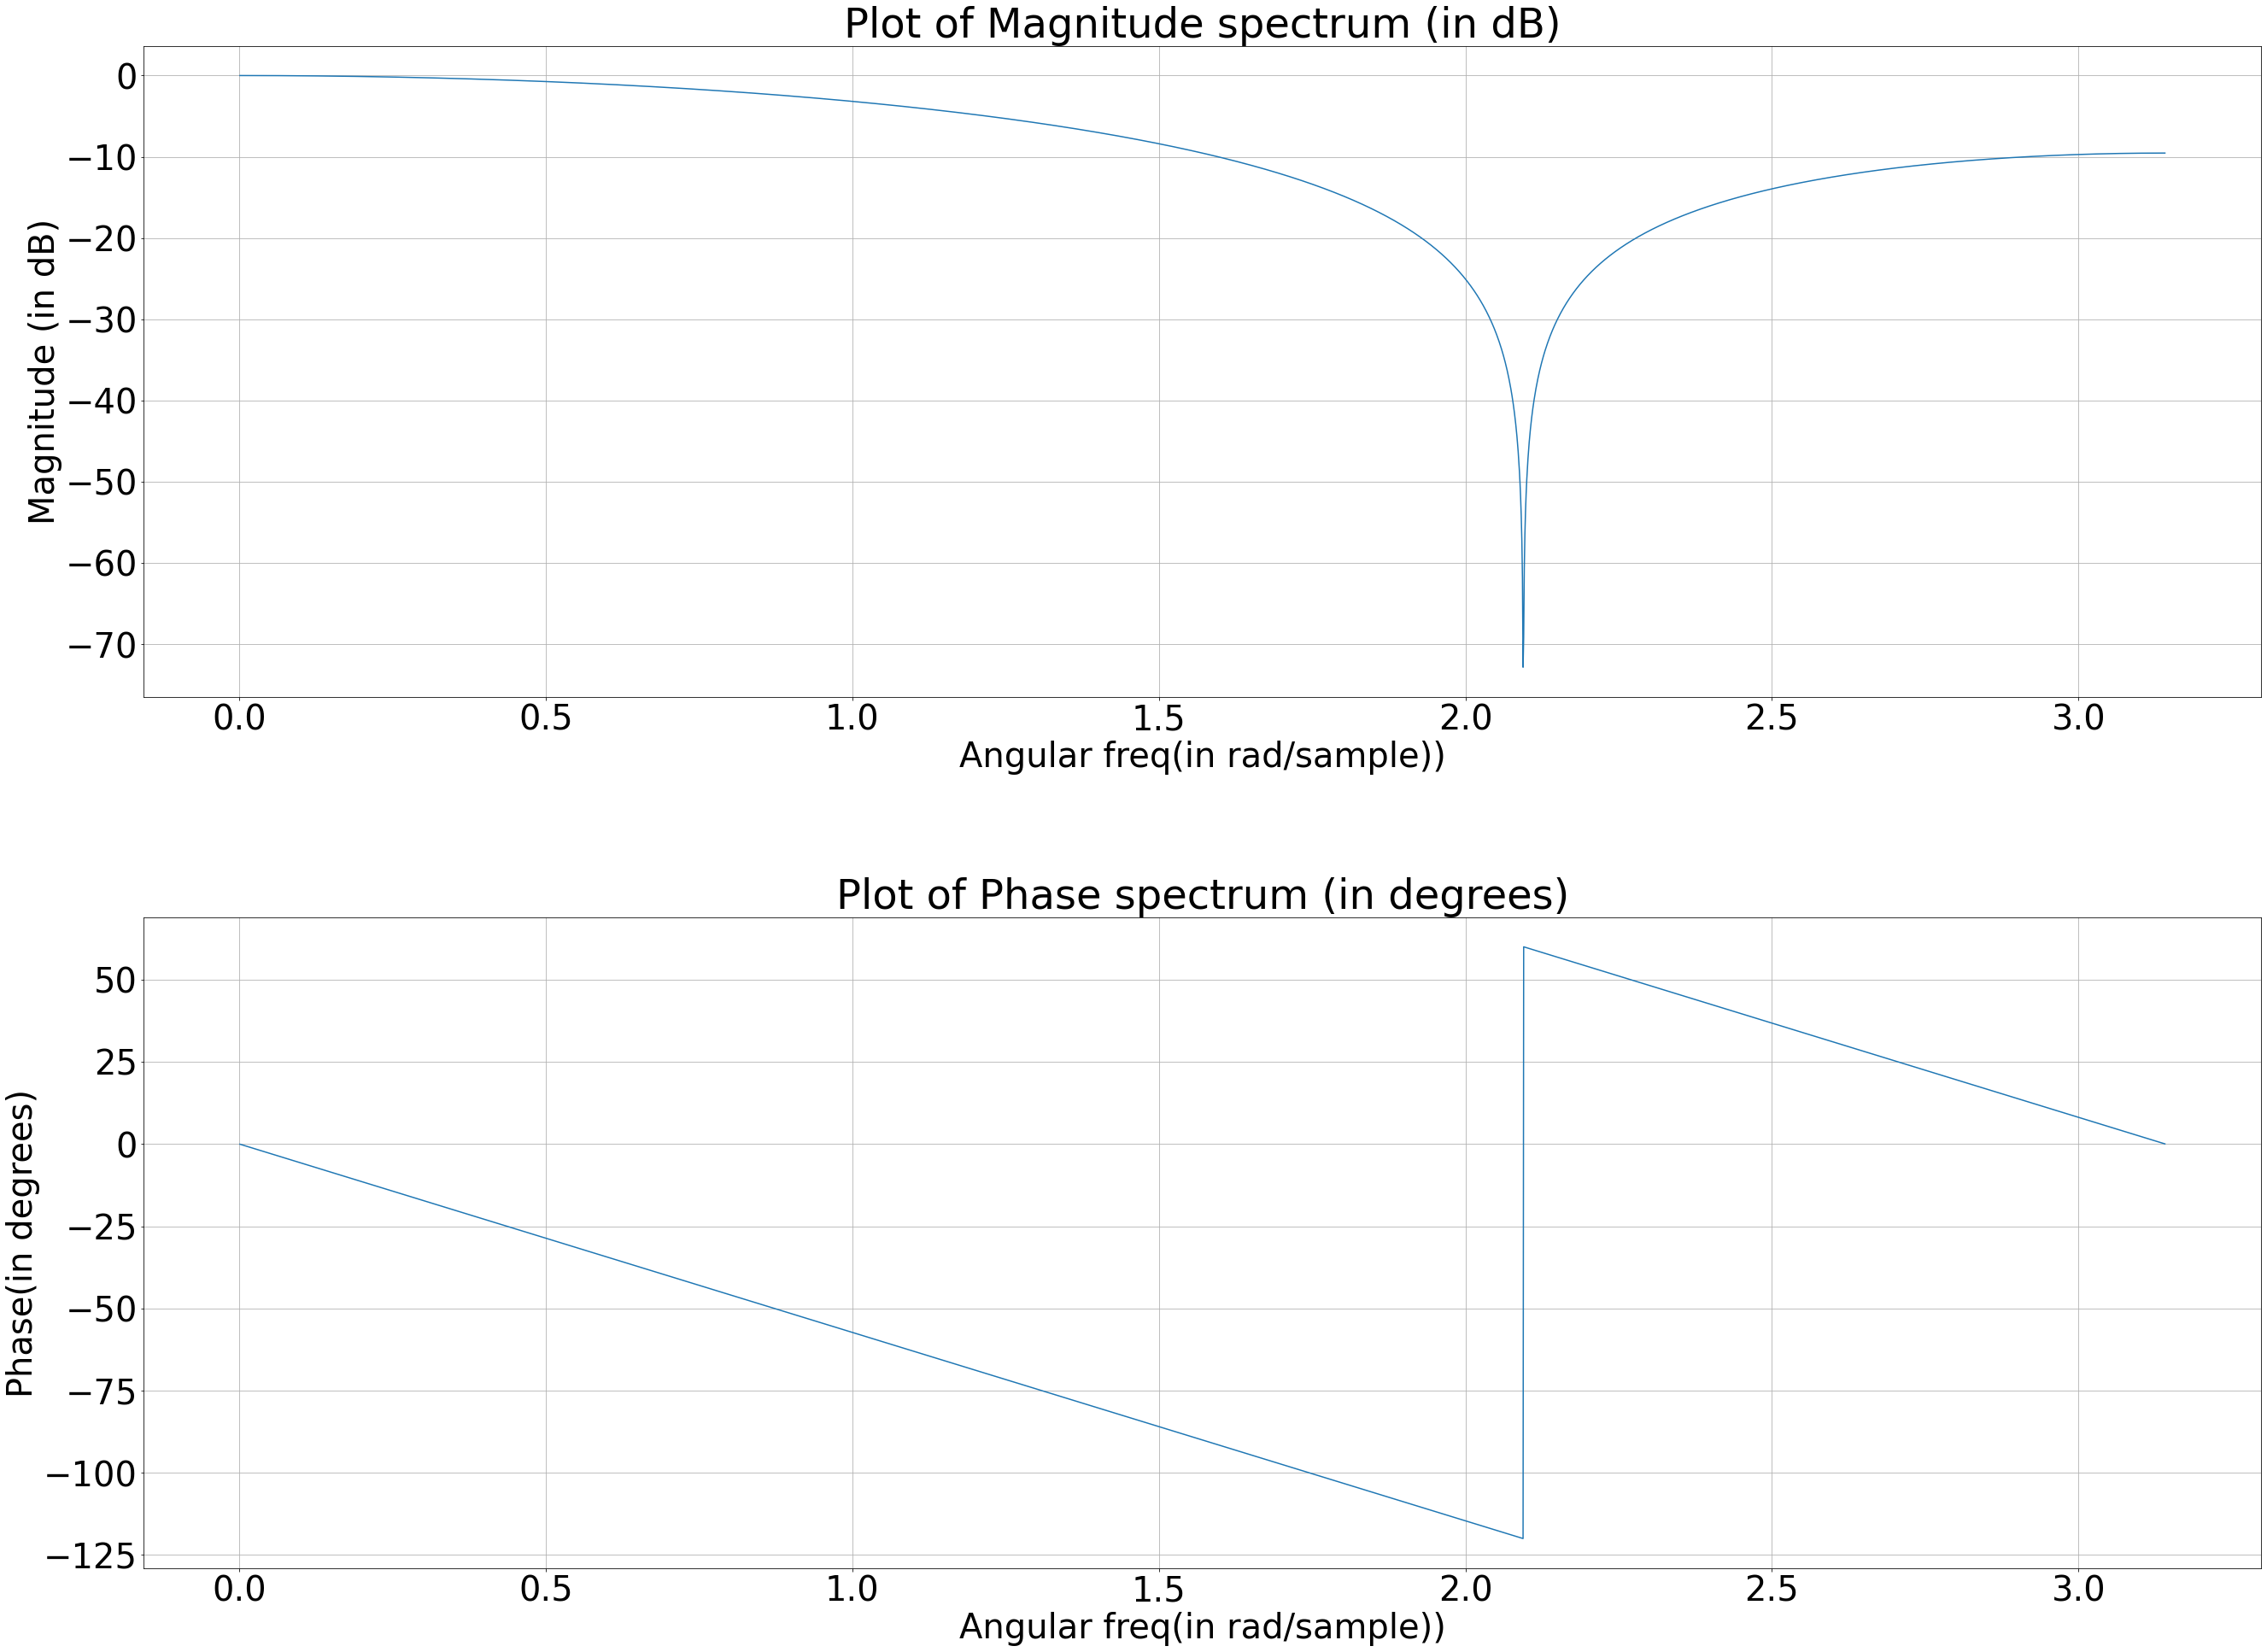

In [109]:
# Plotting the magnitude and phase plots

matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(2,figsize=(40,30))

ax[0].plot(w,mag_H)
ax[0].set_xlabel('Angular freq(in rad/sample))')
ax[0].set_ylabel('Magnitude (in dB)')
ax[0].set_title('Plot of Magnitude spectrum (in dB)')
ax[0].grid()

ax[1].plot(w,ph_H)
ax[1].set_xlabel('Angular freq(in rad/sample))')
ax[1].set_ylabel('Phase(in degrees)')
ax[1].set_title('Plot of Phase spectrum (in degrees)')
ax[1].grid()
fig.tight_layout(pad=3.0)

Applications of Moving Average filter:
1. Image smoothening and blurring
2. Signal denoising

### Improve the above filter by the differential equation: y[n] = 1/4(x[n]) + (1/2)x[n-1] + (1/4)x[n-2]) and again do the whole analysis.

In [110]:
# Transfer function = (1/4)*(1)+(1/2)*z^(-1)+(1/4)*z^(-2)) = (1/4)*(1)+(1/2)*exp(-jw)+(1/4)*exp(-2jw))

w = np.arange(0.001,np.pi,0.001) # Ang freq in rad/sample
H = ((1/4)*(1))+((1/2)*np.exp(-1j*w))+((1/4)*np.exp(-1j*2*w))
mag_H = 20*np.log10(np.abs(H))  # Magnitude in dB
ph_H = np.angle(H,deg=True)     # Phase in degrees

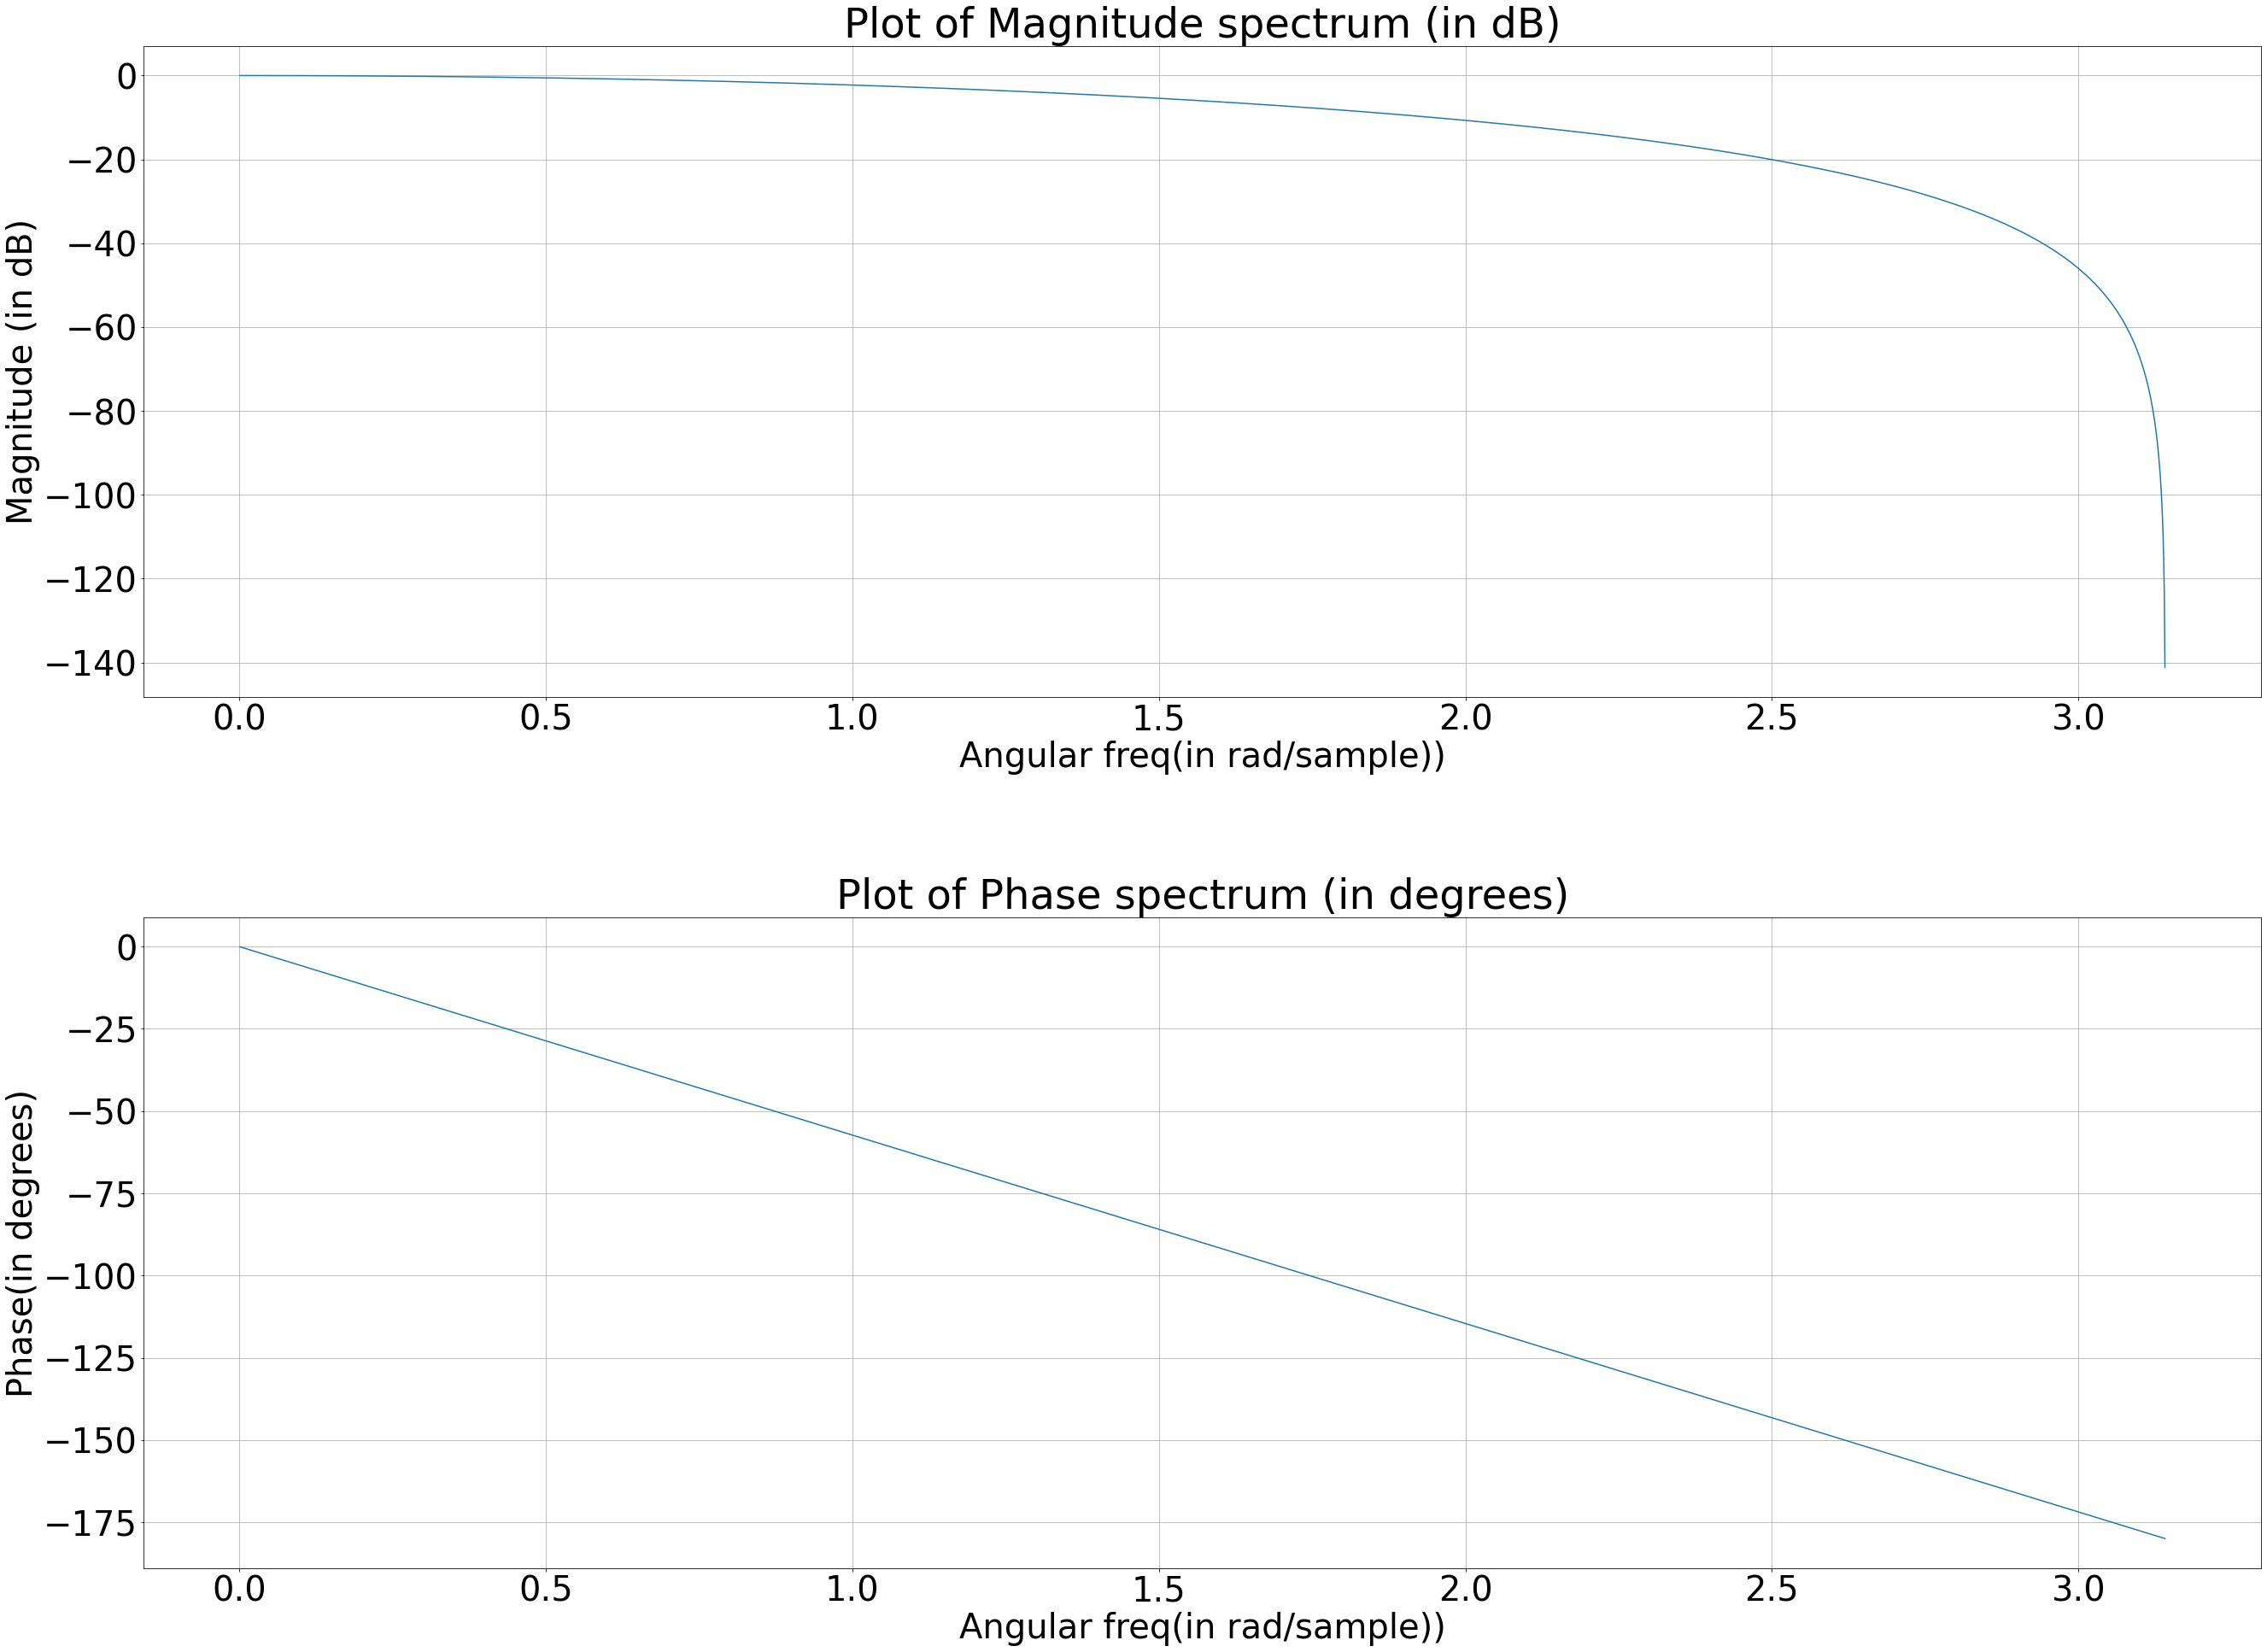

In [111]:
# Plotting the magnitude and phase spectra

matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(2,figsize=(40,30))

ax[0].plot(w,mag_H)
ax[0].set_xlabel('Angular freq(in rad/sample))')
ax[0].set_ylabel('Magnitude (in dB)')
ax[0].set_title('Plot of Magnitude spectrum (in dB)')
ax[0].grid()

ax[1].plot(w,ph_H)
ax[1].set_xlabel('Angular freq(in rad/sample))')
ax[1].set_ylabel('Phase(in degrees)')
ax[1].set_title('Plot of Phase spectrum (in degrees)')
ax[1].grid()
fig.tight_layout(pad=3.0)

## (c) Take any digital image of your choice and apply mean and median filtering. What are the differences between the two? Take an image and add speckle noise to it. Use a particular filter to remove this noise. Take another image and add salt and pepper noise and again use a particular filter to remove the noise. Plot the original images, noisy images and images after noise removal respectively. 

In [112]:
# Function definition of 2D mean filter

def mean_filt2d(im,M):
    im_float = im.astype(float)/255
    H,W = im_float.shape
    im_filt = im_float
    for r in range(M//2,H-(M//2)):
        for c in range(M//2,W-(M//2)):
            temp_arr = im_float[r-(M//2):r+1+(M//2),c-(M//2):c+1+(M//2)]
            val = np.mean(temp_arr)
            im_filt[r,c] = val
    im_filt = im_filt*255
    im_filt = im_filt.astype('uint8')
    return im_filt

In [113]:
# Function definition of 2D median filter

def median_filt2d(im,M):
    im_float = im.astype(float)/255
    H,W = im_float.shape
    im_filt = im_float
    for r in range(M//2,H-(M//2)):
        for c in range(M//2,W-(M//2)):
            temp_arr = im_float[r-(M//2):r+1+(M//2),c-(M//2):c+1+(M//2)]
            val = np.median(temp_arr)
            im_filt[r,c] = val
    im_filt = im_filt*255
    im_filt = im_filt.astype('uint8')
    return im_filt

In [114]:
# Function definition to add speckle noise to image

def add_speckle_noise(im):
    im_float = im.astype(float)/255
    H,W = im_float.shape
    noise = np.random.normal(0,1,(H,W))
    im_noisy = (im_float*noise) + im_float
    im_noisy = im_noisy*255
    im_noisy = im_noisy.astype('uint8')
    return im_noisy

In [115]:
# Function definition to add salt and pepper noise to image

def add_sp_noise(im,s_vs_p,alpha):
    im_float = im.astype(float)/255
    H,W = im_float.shape
    im_noisy = im_float
    
    # Adding salt noise
    num_salt = np.ceil(H*W*s_vs_p*alpha)
    r_pos = np.random.randint(0, H-1, int(num_salt))
    c_pos = np.random.randint(0, W-1, int(num_salt))
    im_noisy[r_pos,c_pos] = 1
    
     # Adding pepper noise
    num_pepp = np.ceil(H*W*(1-s_vs_p)*alpha)
    r_pos = np.random.randint(0, H-1, int(num_pepp))
    c_pos = np.random.randint(0, W-1, int(num_pepp))
    im_noisy[r_pos,c_pos] = 0
    
    im_noisy = im_noisy*255
    im_noisy = im_noisy.astype('uint8')
    return im_noisy

In [116]:
img_path = "C:\D_drive\IITG\Sem-2\DSP Lab\Assignments\Assignment-7\Lenna.png"


orig_img = cv2.imread(img_path)      # Original image
img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY)   # Grayscale image


M = 11   # Window size of filter
img_mean_filt = mean_filt2d(img,M)
img_median_filt = median_filt2d(img,M)

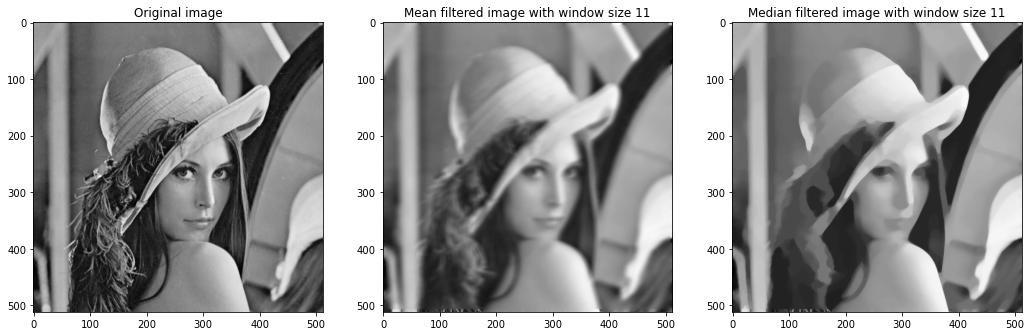

In [117]:
# Calculating the mean and median filtered output images and displaying them

images = [img,img_mean_filt,img_median_filt] 
titles = ['Original image',f'Mean filtered image with window size {M}',f'Median filtered image with window size {M}']

matplotlib.rcParams.update({'font.size': 10})
fig,ax = plt.subplots(1,3,figsize=(15,10))

for i in range(3):
    ax[i].imshow(images[i],cmap='gray')
    ax[i].set_title(titles[i])
    
fig.tight_layout(pad=3.0)

Differences between mean and median filter:
1. Mean filter is a linear filter whereas median filter is a non-linear filter
2. Mean filter smoothens the homogenous regions but blurs the edges. Whereas median filter preserves the edges

Observations:
From the above images, it is observed that although median filter preserves edges, it removes the fine details in the image. Whereas mean filter smoothens the image and at the same time blurs the edges.


Mean filter is the most appropriate filter to remove speckle noise in image

In [118]:
# Adding speckle noise to image

img_speck_noisy = add_speckle_noise(img)

M = 3   # Window size of mean filter
img_speck_filt = mean_filt2d(img,M)

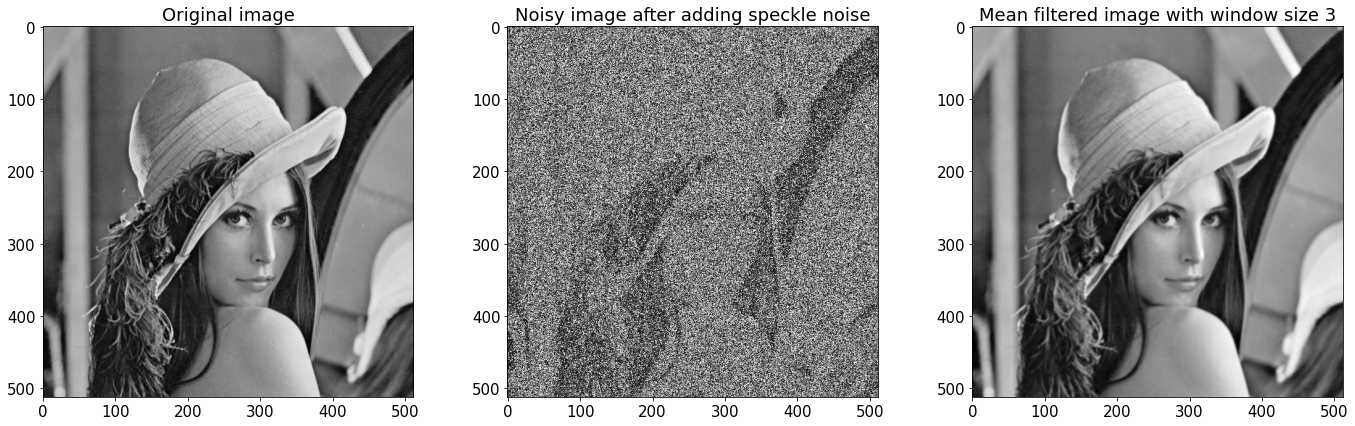

In [119]:
# Calculating the mean filtered output images and displaying the original,noisy and filtered image

images = [img,img_speck_noisy,img_speck_filt] 
titles = ['Original image','Noisy image after adding speckle noise',f'Mean filtered image with window size {M}']
matplotlib.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,len(images),figsize=(20,10))

for i in range(len(images)):
    ax[i].imshow(images[i],cmap='gray')
    ax[i].set_title(titles[i])
    
fig.tight_layout(pad=3.0)

In [120]:
# Adding salt and pepper noise to image

img_sp_noisy = add_sp_noise(img,0.5,0.1)  # 0.5->Proportion of salt, 0.05->Percentage of noise pixels

M = 3  # Window size of median filter
img_sp_filt = median_filt2d(img,M)   # Output of median filter

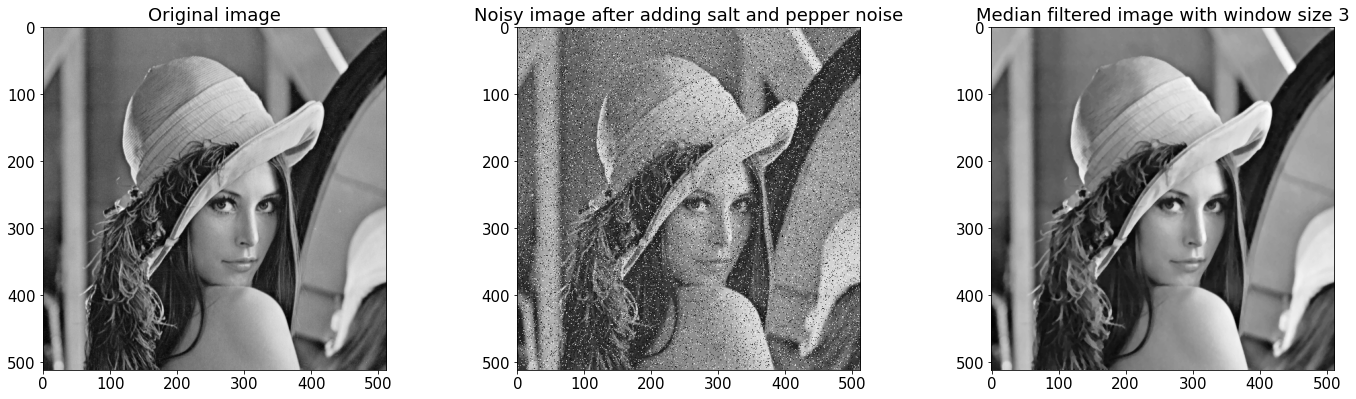

In [121]:
# Calculating the median filtered output images and displaying the original,noisy and filtered image

images = [img,img_sp_noisy,img_sp_filt] 
titles = ['Original image','Noisy image after adding salt and pepper noise',f'Median filtered image with window size {M}']

matplotlib.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(1,3,figsize=(20,10))

for i in range(3):
    ax[i].imshow(images[i],cmap='gray')
    ax[i].set_title(titles[i])
    
fig.tight_layout(pad=3.0)

## (d) Can we convert an analog filter into a digital filter altogether? What is the way to do it? Use the technique to convert all the analog filters into digital filters and plot the amplitude and frequency plots.

Yes. Analog filter can be converted into a digital filter by using bilinear transformation. Bilinear transformation converts S-domain (continuous-time) transfer function Hc(s) into Z-domain (discrete-time) transfer function H(z) by replacing s in Hc(s) with 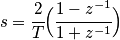

where  is the sampling period of the discrete-time system. The resulting Z-domain transfer function is therefore
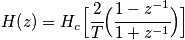

The mapping between S-domain frequency (u) and Z-domain frequency (w) can be expressed in the following relations:
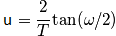

In [122]:
fs = 10000  # Sampling freq in Hz
Ts = 1/fs   # Sampling time period

Consider the continuous-time Transfer function to be Hc(u), and the corresponding discrete-time transfer function to be H(w) and 
H(w) = Hc(u)

### For continuous-time transfer function in part-1 of analog filters: 

In [123]:
R = 47*(10**3) # in ohms
C = 47*(10**(-9)) # in Farads

u_c = 72*2*np.pi  # continuous-time domain cutoff frequency (in Hz)
w_c = (2*u_c)/fs # Desired Discrete-time domain cutoff frequency (in rad/sample)

# Warped time period, T_warped = (2/u_c)tan(w_c/2)
T_w = (2/u_c)*np.tan(w_c/2)

# Continuous time domain transfer function, Hc(u) = 1/(juRC+1)
w = np.arange(0.001,np.pi,0.001)

# Relationship between continuous time domain frequency(u) and discrete time domain frequency(w)
# u = (2/T_warped)*np.tan(w/2) 
u = (2/T_w)*np.tan(w/2)

H = 1/((1j*u*R*C)+1)  # Discrete time domain transfer function, H(w)
mag_H = 20*np.log10(np.abs(H))   # Magnitude in dB
ph_H = np.angle(H,deg=True)      # Phase in degrees

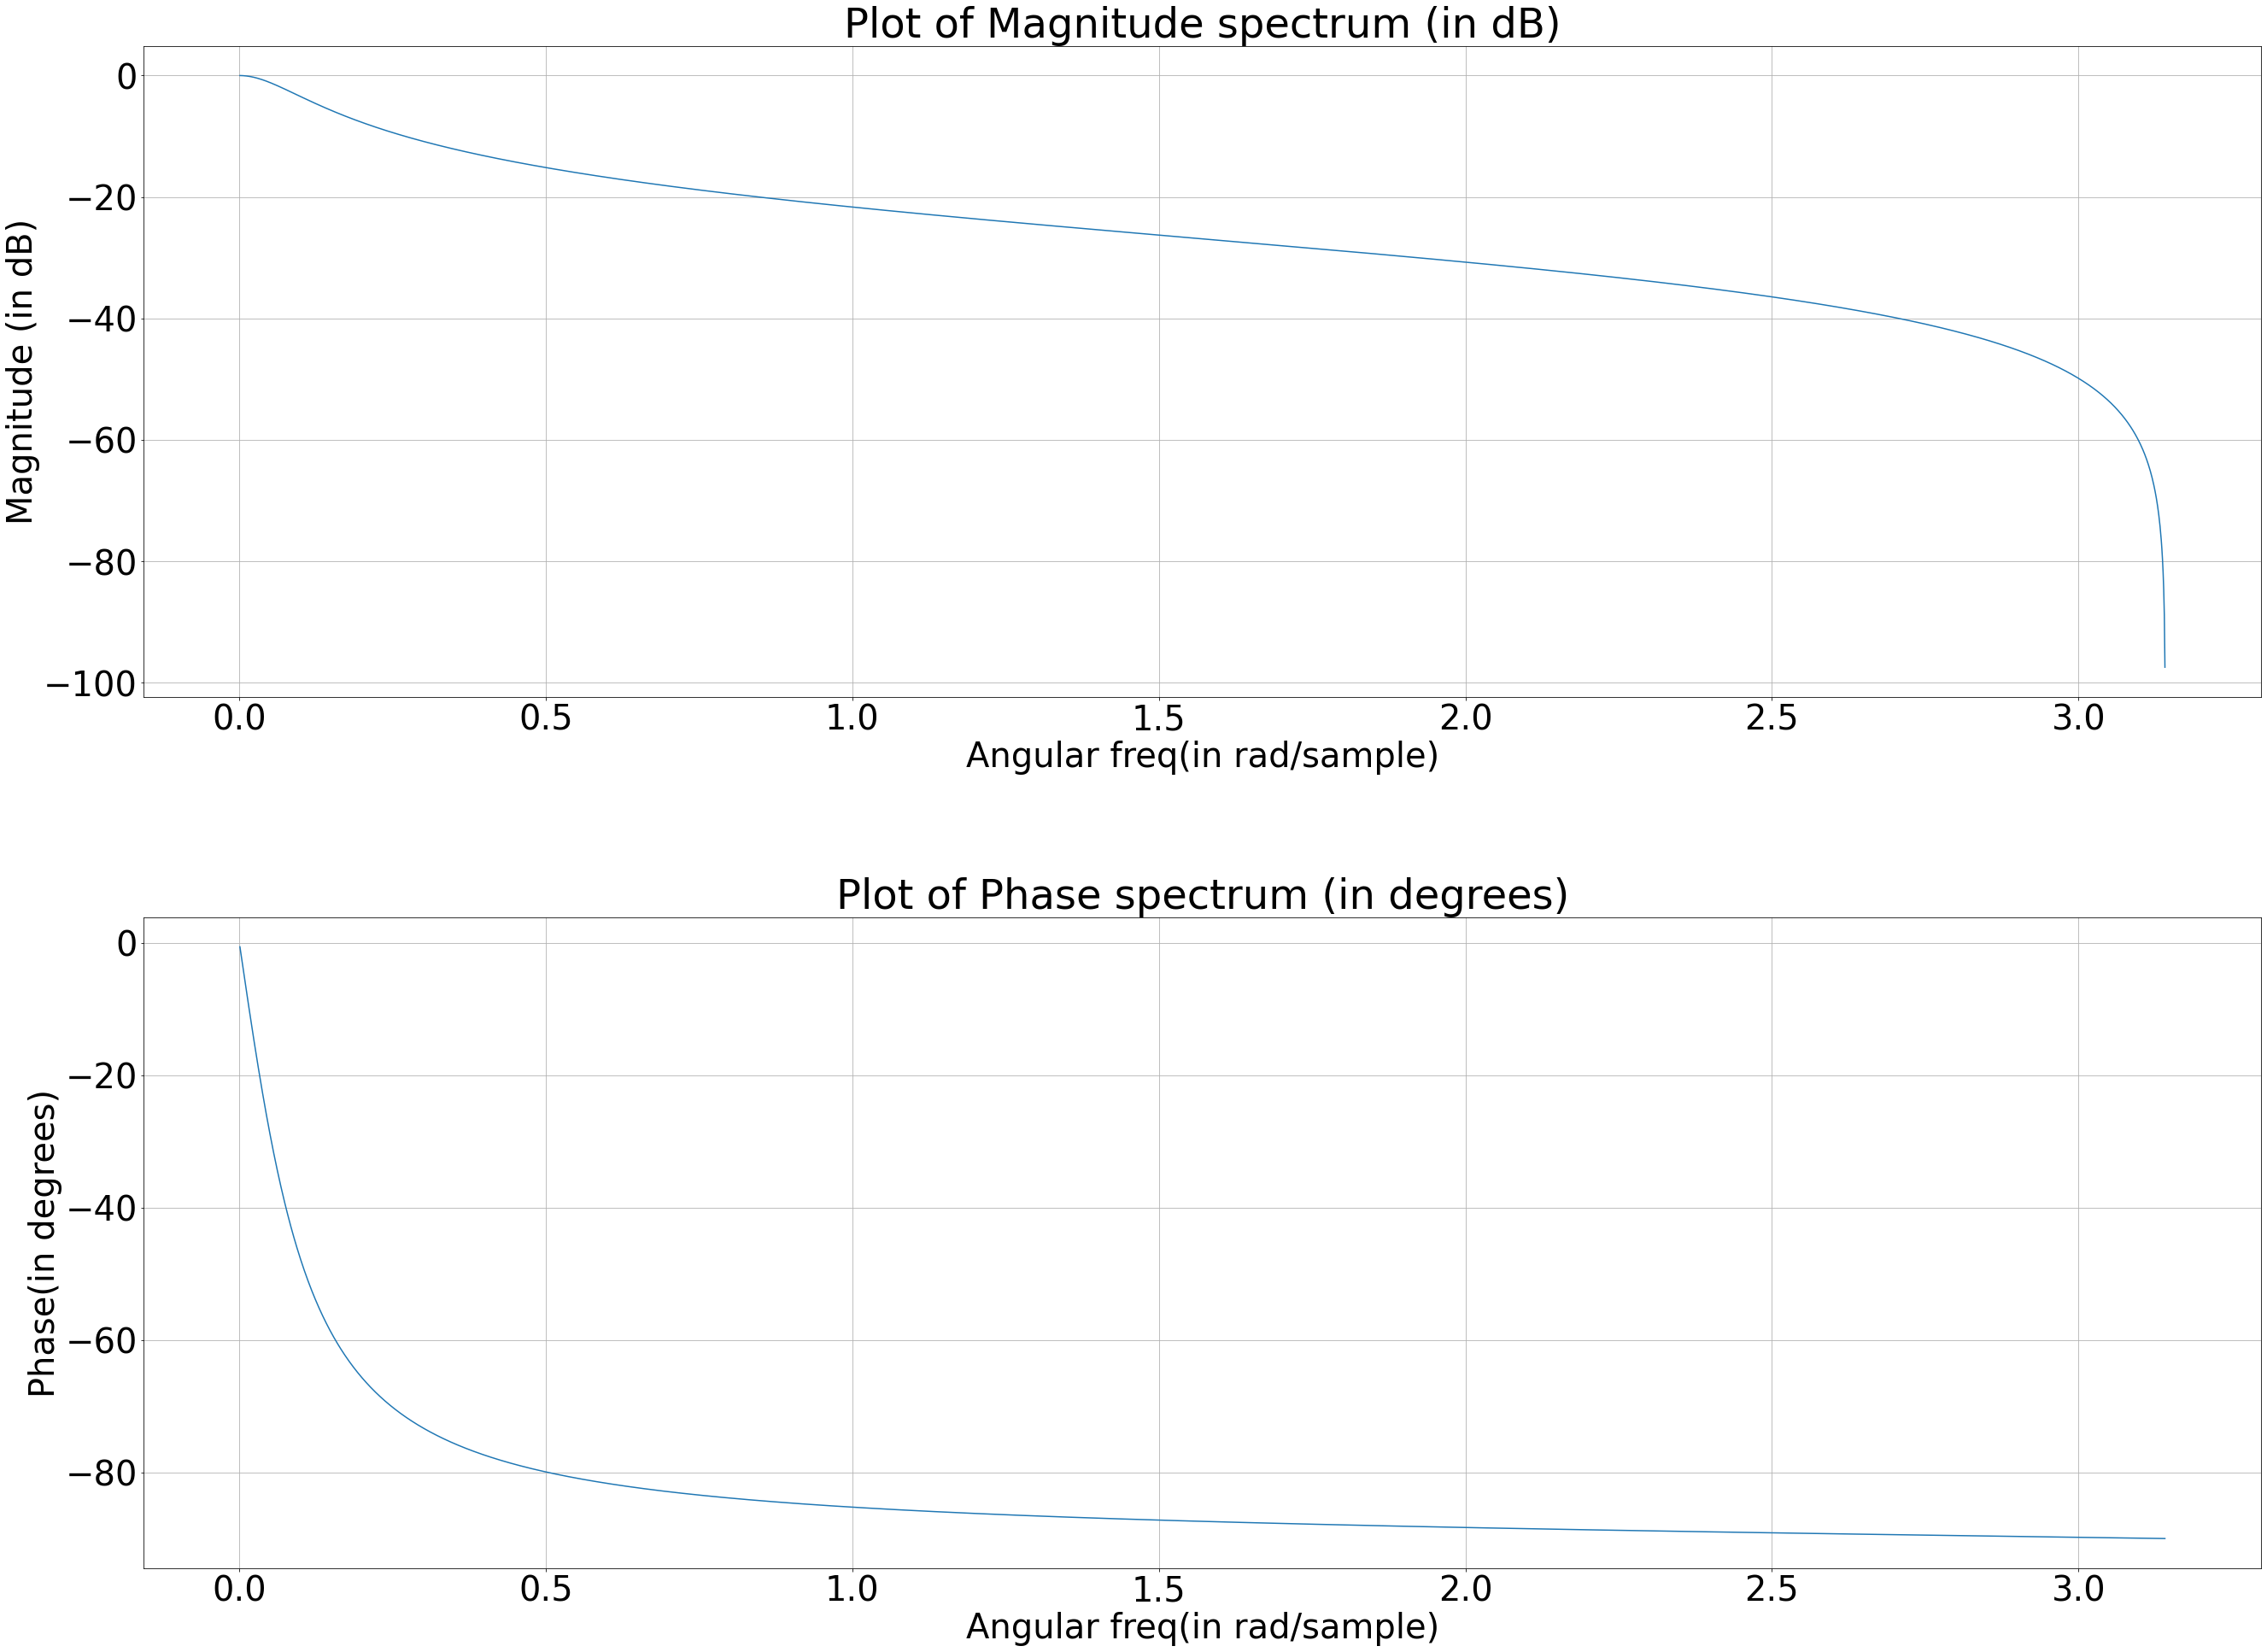

In [124]:
# Plotting the magnitude and phase spectra

matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(2,figsize=(40,30))

ax[0].plot(w,mag_H)
ax[0].set_xlabel('Angular freq(in rad/sample)')
ax[0].set_ylabel('Magnitude (in dB)')
ax[0].set_title('Plot of Magnitude spectrum (in dB)')
ax[0].grid()

ax[1].plot(w,ph_H)
ax[1].set_xlabel('Angular freq(in rad/sample)')
ax[1].set_ylabel('Phase(in degrees)')
ax[1].set_title('Plot of Phase spectrum (in degrees)')
ax[1].grid()
fig.tight_layout(pad=3.0)

### For continuous-time transfer function in part-2 of analog filters: 

In [125]:
R = 47*(10**3) # in ohms
C = 47*(10**(-9)) # in Farads

u_c = 72*2*np.pi  # continuous-time domain cutoff frequency (in Hz)
w_c = (2*u_c)/fs # Desired Discrete-time domain cutoff frequency (in rad/sample)

# Warped time period, T_warped = (2/u_c)tan(w_c/2)
T_w = (2/u_c)*np.tan(w_c/2)

# Continuous time domain transfer function, Hc(u) = (1juRC)/(juRC+1)
w = np.arange(0.001,np.pi,0.001)

# Relationship between continuous time domain frequency(u) and discrete time domain frequency(w)
# u = (2/T_warped)*np.tan(w/2) 
u = (2/T_w)*np.tan(w/2)

H = (1j*u*R*C)/((1j*u*R*C)+1)  # Discrete time domain transfer function, H(w)
mag_H = 20*np.log10(np.abs(H))   # Magnitude in dB
ph_H = np.angle(H,deg=True)      # Phase in degrees

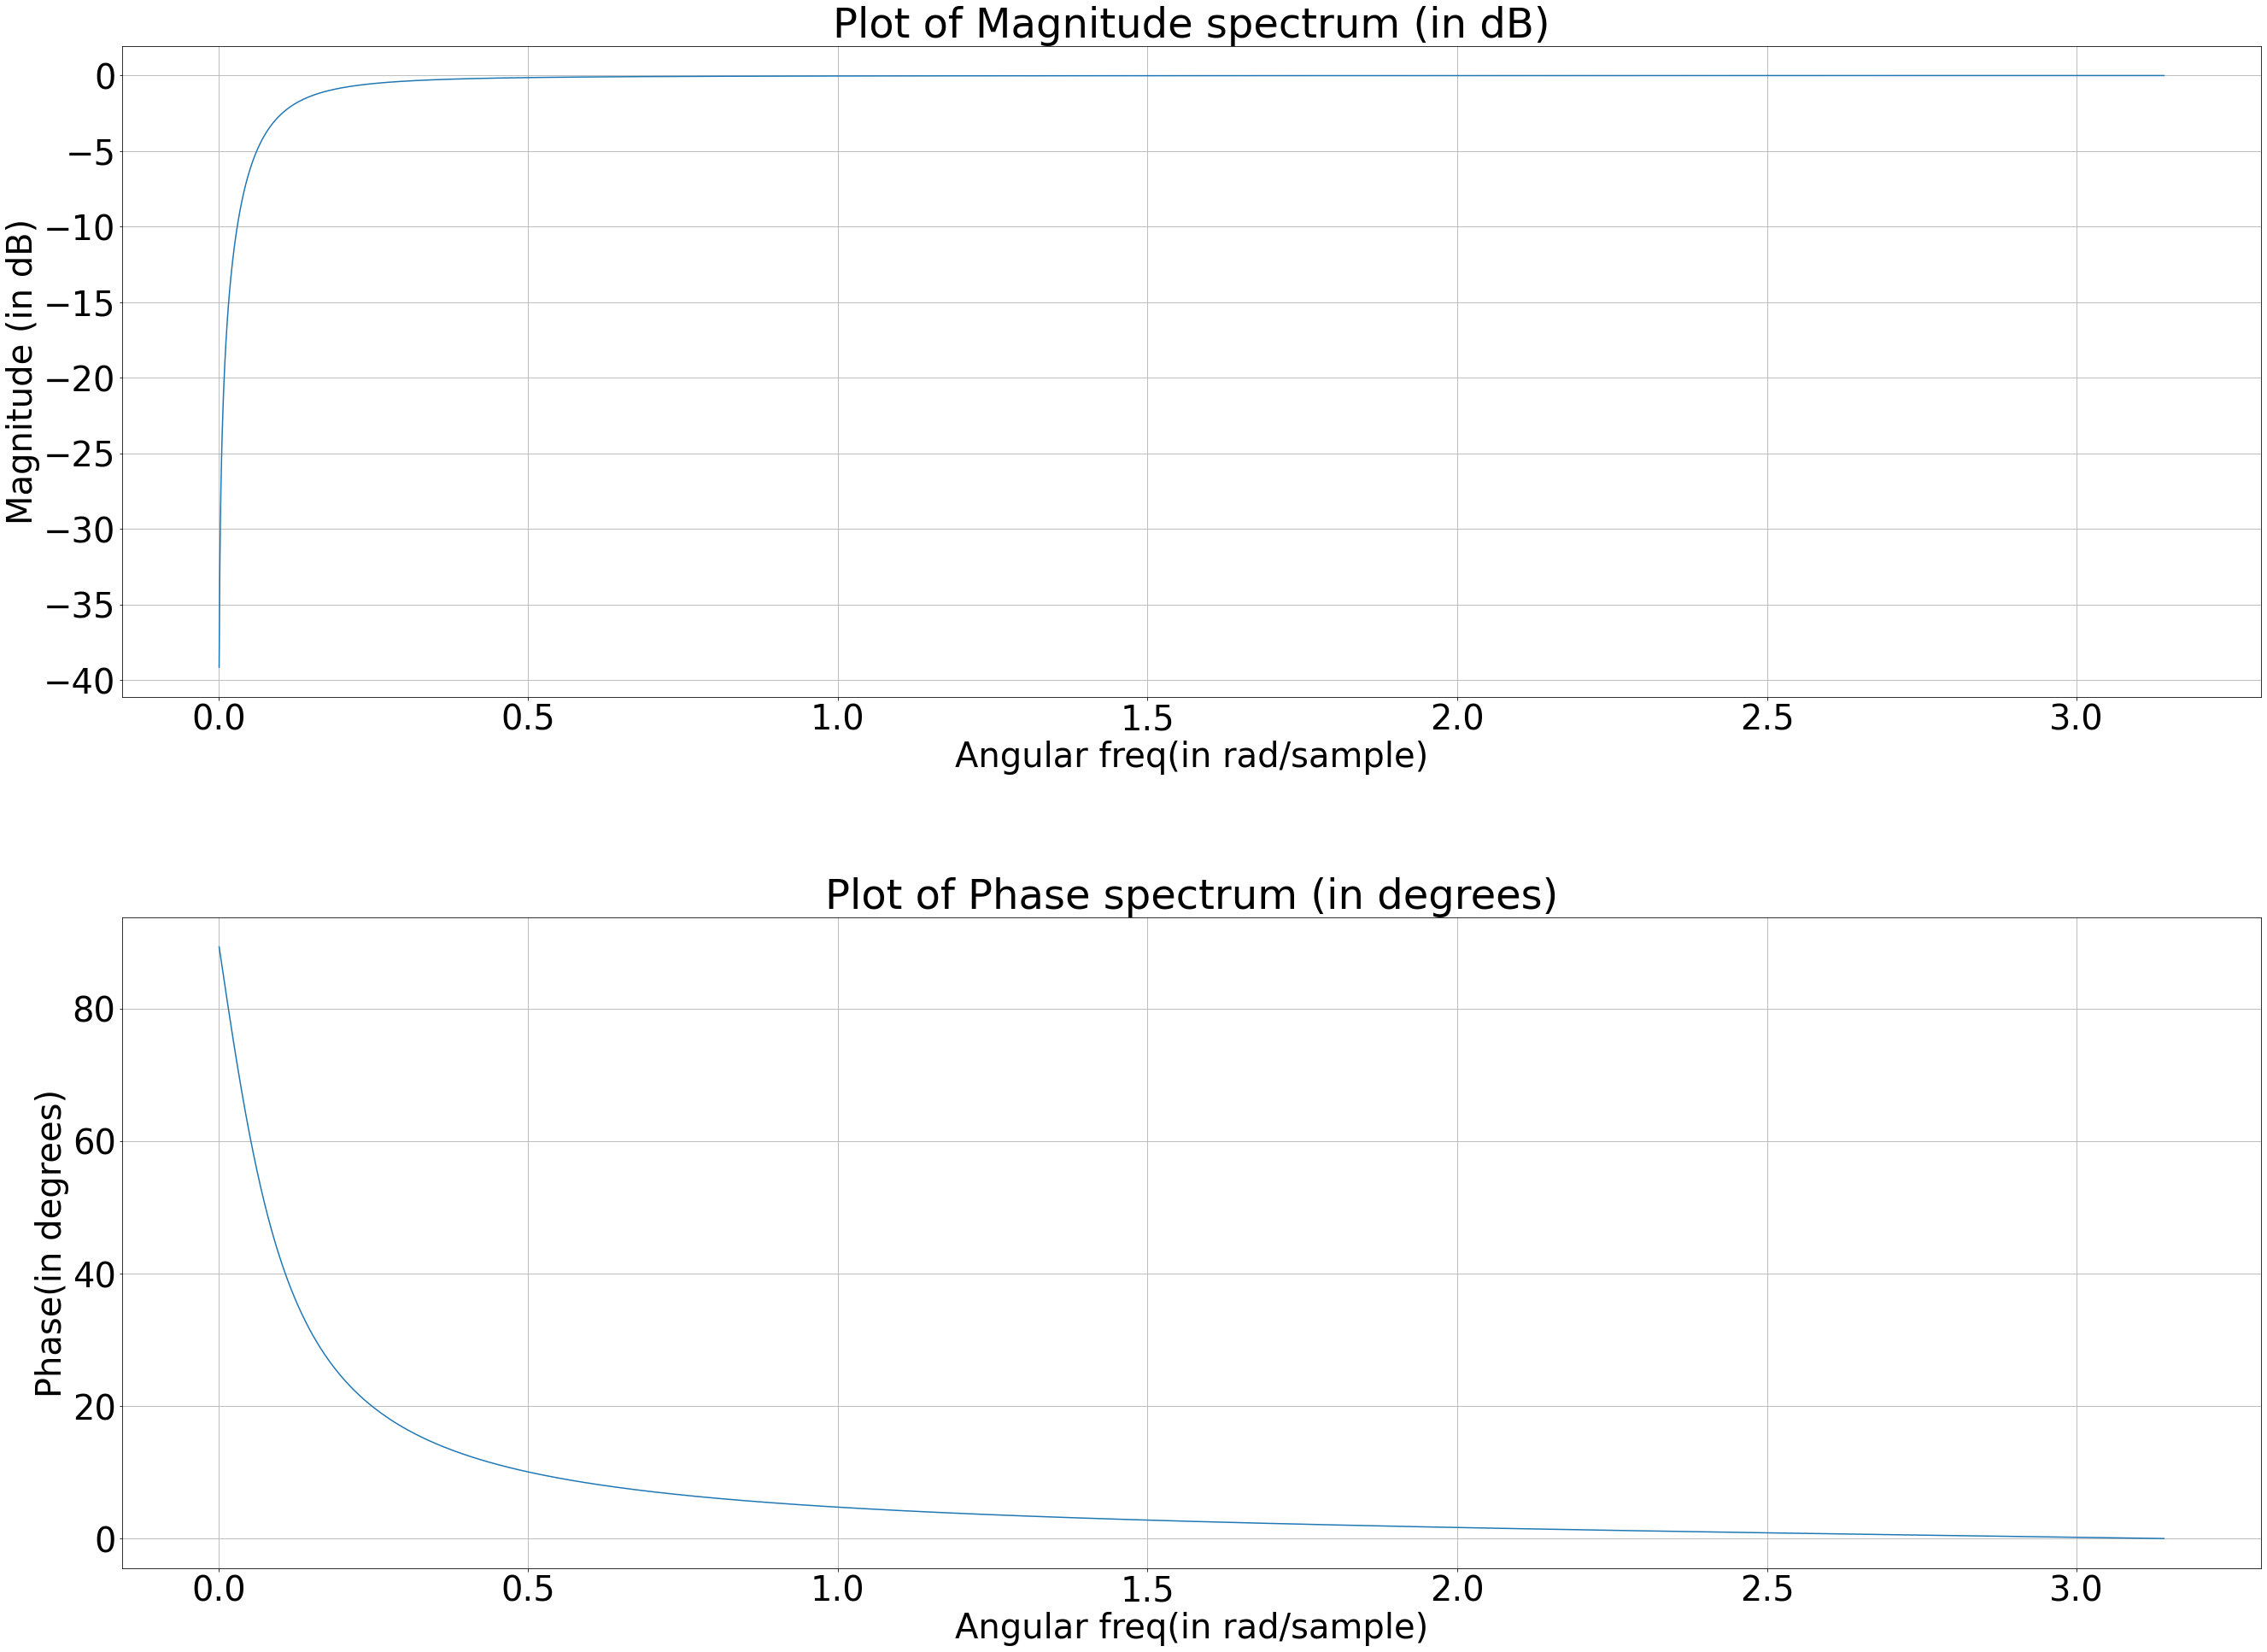

In [126]:
# Plotting the magnitude and phase spectra

matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(2,figsize=(40,30))

ax[0].plot(w,mag_H)
ax[0].set_xlabel('Angular freq(in rad/sample)')
ax[0].set_ylabel('Magnitude (in dB)')
ax[0].set_title('Plot of Magnitude spectrum (in dB)')
ax[0].grid()

ax[1].plot(w,ph_H)
ax[1].set_xlabel('Angular freq(in rad/sample)')
ax[1].set_ylabel('Phase(in degrees)')
ax[1].set_title('Plot of Phase spectrum (in degrees)')
ax[1].grid()
fig.tight_layout(pad=3.0)

### For continuous-time transfer function in part-3 of analog filters: 

In [127]:
R = 50*(10**3) # in ohms
C = 50*(10**(-9)) # in Farads

u_c = 41*2*np.pi  # continuous-time domain cutoff frequency (in Hz)
w_c = (2*u_c)/fs # Desired Discrete-time domain cutoff frequency (in rad/sample)

# Warped time period, T_warped = (2/u_c)tan(w_c/2)
T_w = (2/u_c)*np.tan(w_c/2)

# Continuous time domain transfer function, Hc(u) = 1/(juRC+1)^2
w = np.arange(0.001,np.pi,0.001)

# Relationship between continuous time domain frequency(u) and discrete time domain frequency(w)
# u = (2/T_warped)*np.tan(w/2) 
u = (2/T_w)*np.tan(w/2)

H = 1/((1j*u*R*C)+1)**2  # Discrete time domain transfer function, H(w)
mag_H = 20*np.log10(np.abs(H))   # Magnitude in dB
ph_H = np.angle(H,deg=True)      # Phase in dB

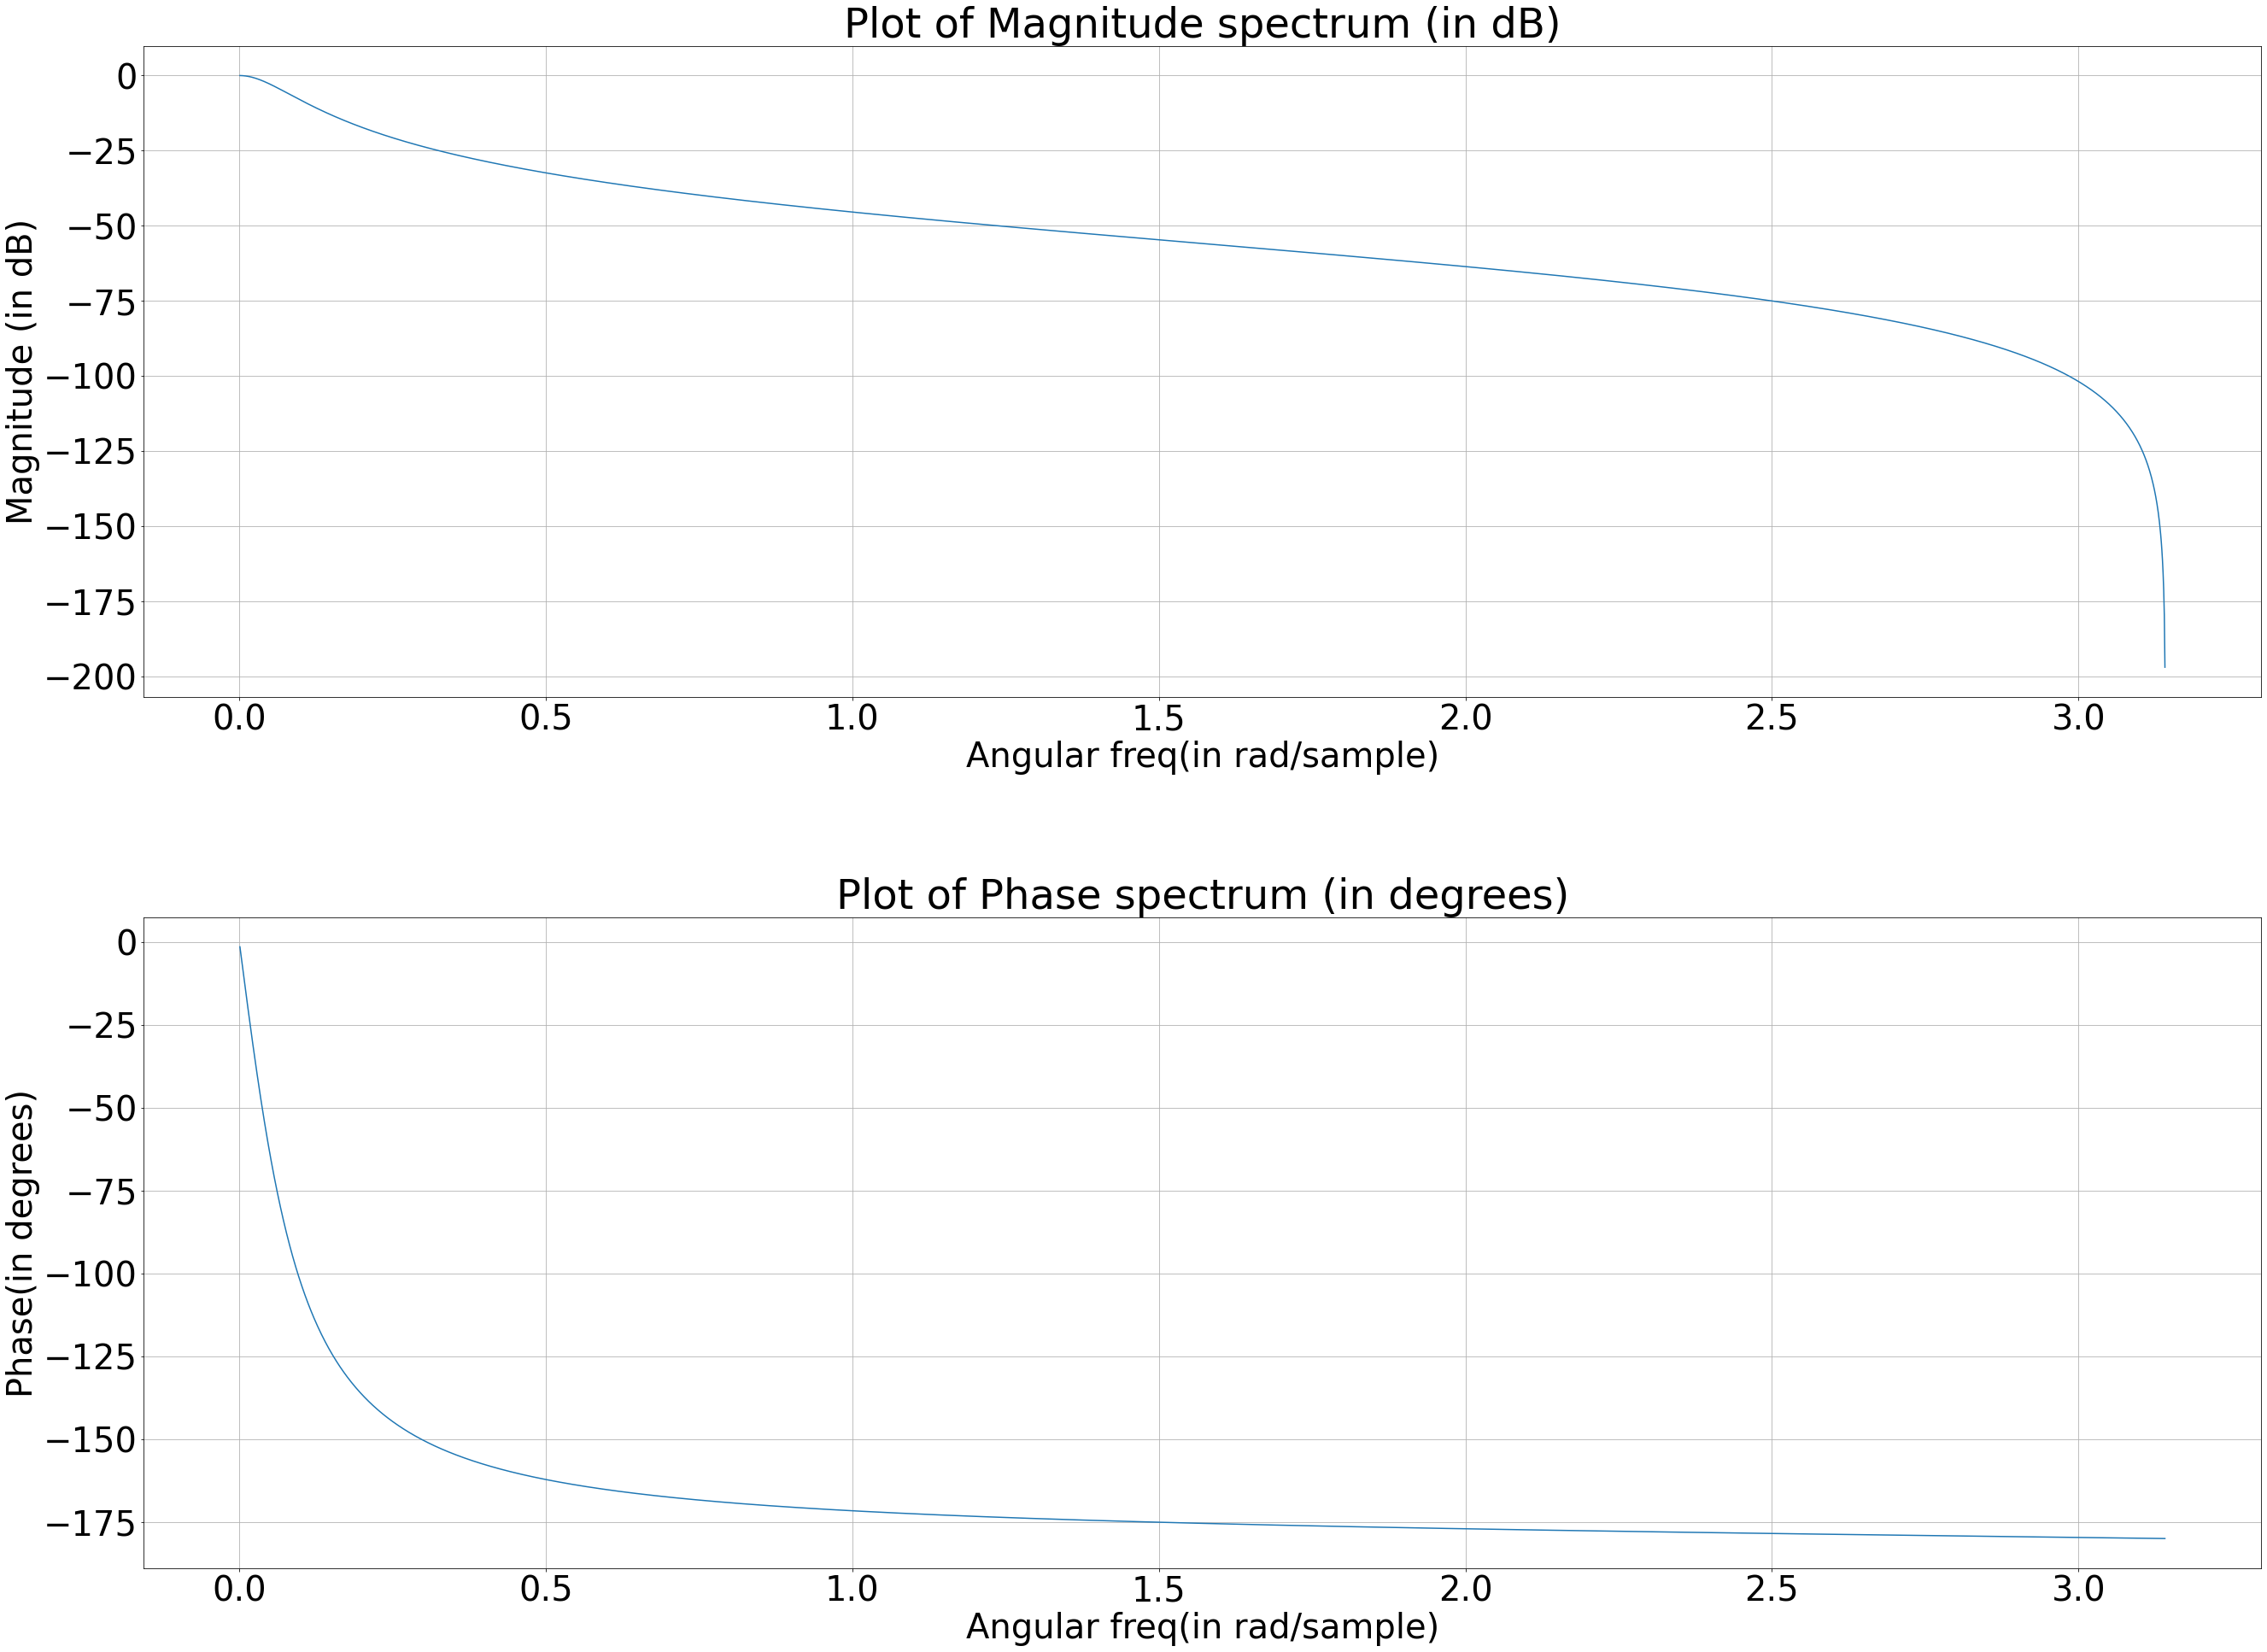

In [128]:
# Plotting the magnitude and phase spectra

matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(2,figsize=(40,30))

ax[0].plot(w,mag_H)
ax[0].set_xlabel('Angular freq(in rad/sample)')
ax[0].set_ylabel('Magnitude (in dB)')
ax[0].set_title('Plot of Magnitude spectrum (in dB)')
ax[0].grid()

ax[1].plot(w,ph_H)
ax[1].set_xlabel('Angular freq(in rad/sample)')
ax[1].set_ylabel('Phase(in degrees)')
ax[1].set_title('Plot of Phase spectrum (in degrees)')
ax[1].grid()
fig.tight_layout(pad=3.0)

### For continuous-time transfer function in part-4 of analog filters: 

In [129]:
R = 50*(10**3) # in ohms
C1 = 1/(2*np.pi*f_L*R)   # C1 = 1/(2pi*f_L*R)
C2 = 1/(2*np.pi*f_H*R)   # C2 = 1/(2pi*f_H*R)


# Continuous time domain transfer function, Hc(u) = (juRC1/(juRC1+1))*(1/(juRC2+1))
w = np.arange(0.001,np.pi,0.001)

# Relationship between continuous time domain frequency(u) and discrete time domain frequency(w)
# u = (2/Ts)*np.tan(w/2) 
u = (2/Ts)*np.tan(w/2)

H = ((1j*u*R*C1)/((1j*u*R*C1)+1))*(1/((1j*u*R*C2)+1))  # Discrete time domain transfer function, H(w)
mag_H = 20*np.log10(np.abs(H))    # Magnitude in dB
ph_H = np.angle(H,deg=True)       # Phase in degrees

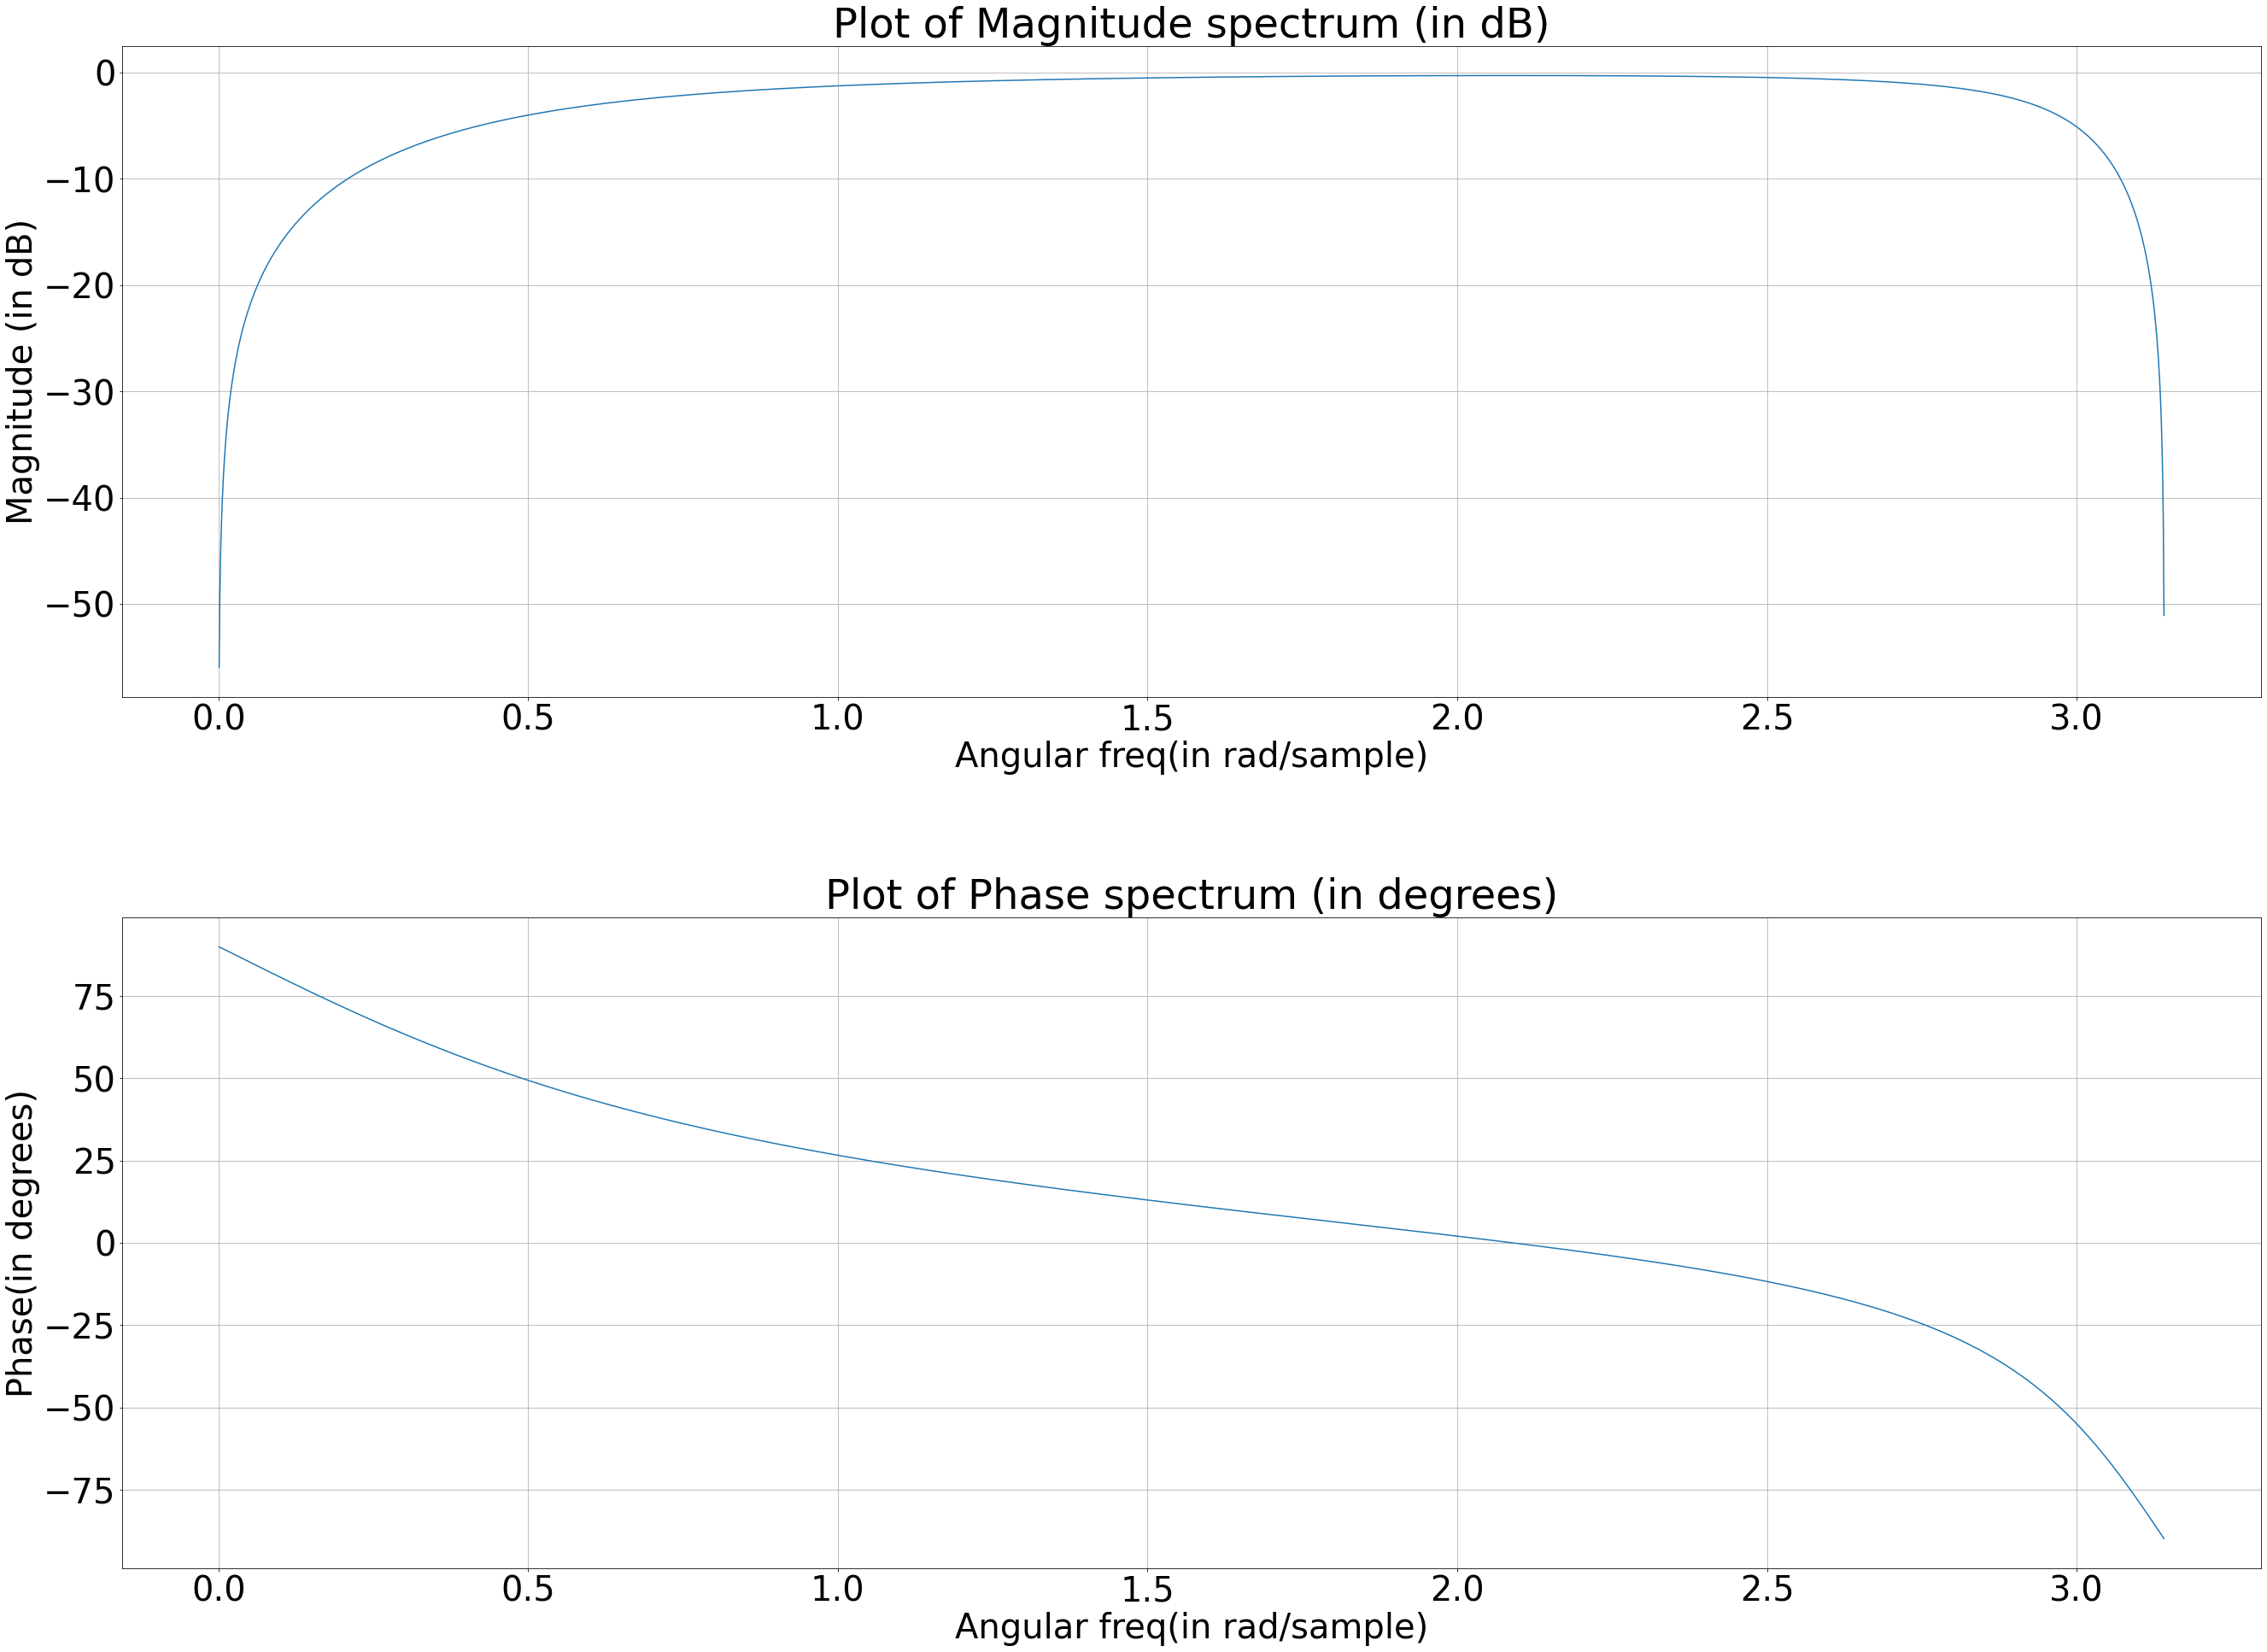

In [130]:
# Plotting the magnitude and phase spectra

matplotlib.rcParams.update({'font.size': 40})
fig,ax = plt.subplots(2,figsize=(40,30))

ax[0].plot(w,mag_H)
ax[0].set_xlabel('Angular freq(in rad/sample)')
ax[0].set_ylabel('Magnitude (in dB)')
ax[0].set_title('Plot of Magnitude spectrum (in dB)')
ax[0].grid()

ax[1].plot(w,ph_H)
ax[1].set_xlabel('Angular freq(in rad/sample)')
ax[1].set_ylabel('Phase(in degrees)')
ax[1].set_title('Plot of Phase spectrum (in degrees)')
ax[1].grid()
fig.tight_layout(pad=3.0)